## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

## Loading the dataset

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

# read the data
import pandas as pd
# read the data using the pandas dataframe
data = pd.read_csv('/content/drive/MyDrive/DS/Train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/DS/Test.csv')

Mounted at /content/drive


In [ ]:
# Create copy of dataframe training and test to avoid any changes to original dataframe

df = data.copy()
df_test = data_test.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
# returns the first 5 rows of the train data
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


In [ ]:
# returns the first 5 rows of the test data
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


In [ ]:
# return the shape of the train data set
df.shape

(20000, 41)

Observations:


1.   It is observed that , dataframe has 20000 rows and 41 columns.




In [ ]:
# return the shape of the test data set
df_test.shape

(5000, 41)

Observations:


1.   It is observed that , dataframe has 5000 rows and 41 columns.




In [ ]:
# Checking the data types of the columns for the train dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

Observations:

1.   info() returns pandas dataframe and has total of 41 columns .
2.   It is observed all 40 column(s) are with float64 datatype, 1 column with int64 datatype.
3.   In total, info() uses memory usage of 6.4 MB.
4.   There are 4 columns( Column, Non-Null, Count, Dtype) with 41 rows.



In [ ]:
# Checking the data types of the columns for the test dataset

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

Observations:

1.   info() returns pandas dataframe and has total of 41 columns .
2.   It is observed all 40 column(s) are with float64 datatype, 1 column with int64 datatype.
3.   In total, info() uses memory usage of 6.4 MB.
4.   There are 4 columns( Column, Non-Null, Count, Dtype) with 41 rows.

In [ ]:
# Statistical summary of the train dataset

df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


#### Observation:

1. It is observed that looking at the counts of V1 and V2 can have missing values .
2. It is observed  min and max values for each column  could have wide range of data .

In [ ]:
# Statistical summary of the test dataset

df_test.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
V1,4995.000,-0.278,3.466,-12.382,-2.744,-0.765,1.831,13.504
V2,4994.000,0.398,3.140,-10.716,-1.649,0.427,2.444,14.079
V3,5000.000,2.552,3.327,-9.238,0.315,2.260,4.587,15.315
V4,5000.000,-0.049,3.414,-14.682,-2.293,-0.146,2.166,12.140
V5,5000.000,-0.080,2.111,-7.712,-1.615,-0.132,1.341,7.673
V6,5000.000,-1.042,2.005,-8.924,-2.369,-1.049,0.308,5.068
V7,5000.000,-0.908,1.769,-8.124,-2.054,-0.940,0.212,7.616
V8,5000.000,-0.575,3.332,-12.253,-2.642,-0.358,1.713,10.415
V9,5000.000,0.030,2.174,-6.785,-1.456,-0.080,1.450,8.851
V10,5000.000,0.019,2.145,-8.171,-1.353,0.166,1.511,6.599


#### Observation:

1. It is observed that looking at the counts of V1 and V2 can have missing values .
2. It is observed  min and max values for each column  could have wide range of data .

In [ ]:
# Check the NULL values in the train dataframe

print (df.isnull().sum())

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64


####Observations####

1.   It is observed that V1 and V2 columns have NULL values in train dataset.

In [ ]:
# Check the NULL values in the test dataframe

print (df_test.isnull().sum())

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64


####Observations####

1.   It is observed that V1 and V2 columns have NULL values in test dataset.

In [ ]:
# Find the duplicate rows in the train data set

dups = df[df.duplicated()]

if dups.empty:
  print ("No duplicates found in the Dataset")
else:
  print (dups)

No duplicates found in the Dataset


In [ ]:
# Find the duplicate rows in the test data set

dups = df_test[df_test.duplicated()]

if dups.empty:
  print ("No duplicates found in the Dataset")
else:
  print (dups)

No duplicates found in the Dataset


## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

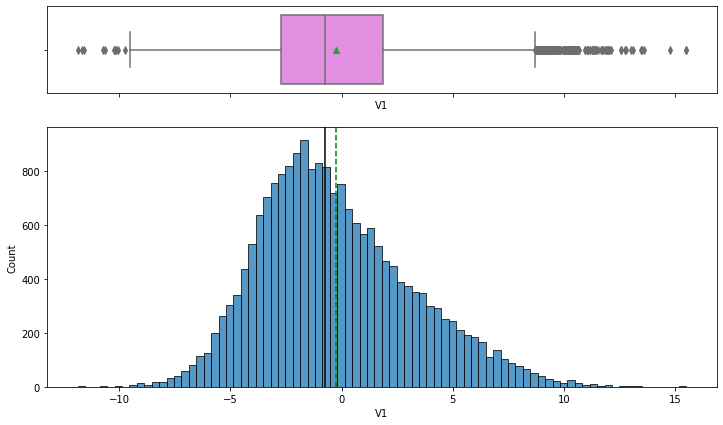

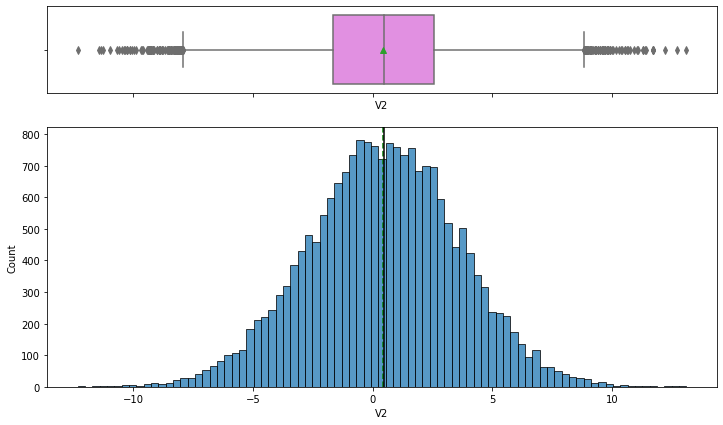

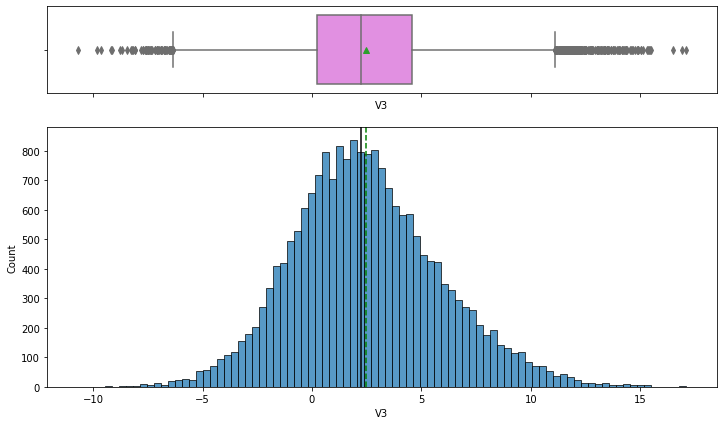

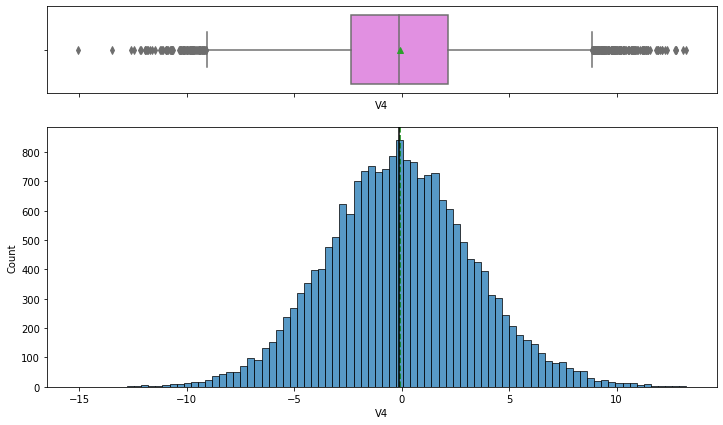

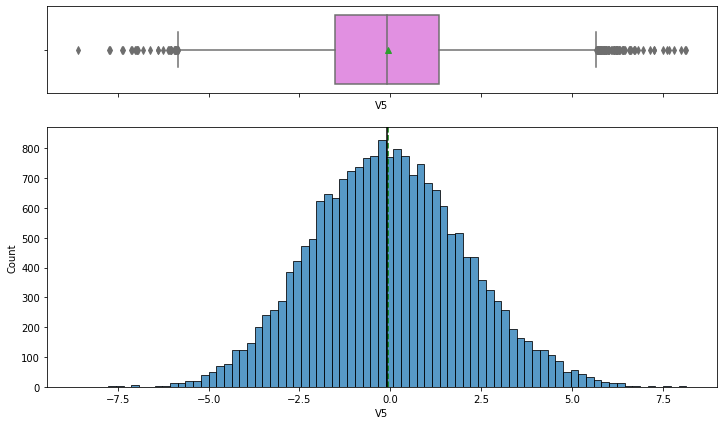

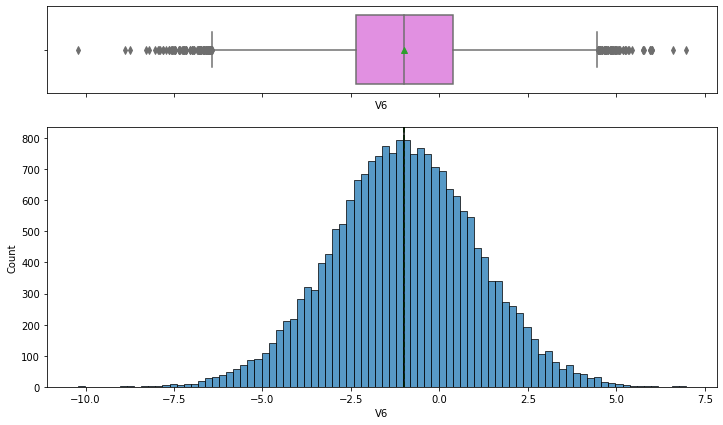

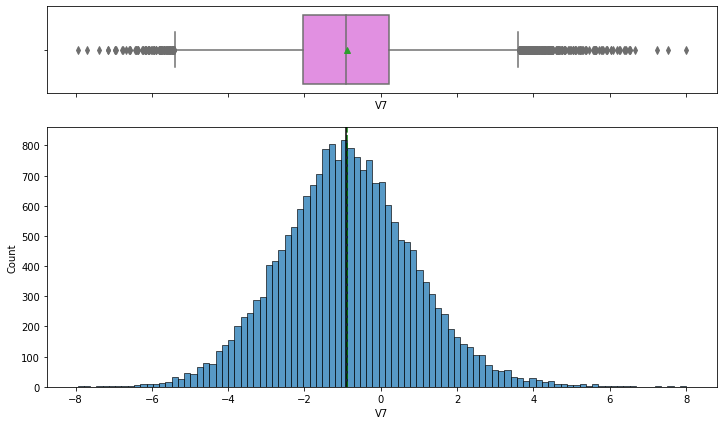

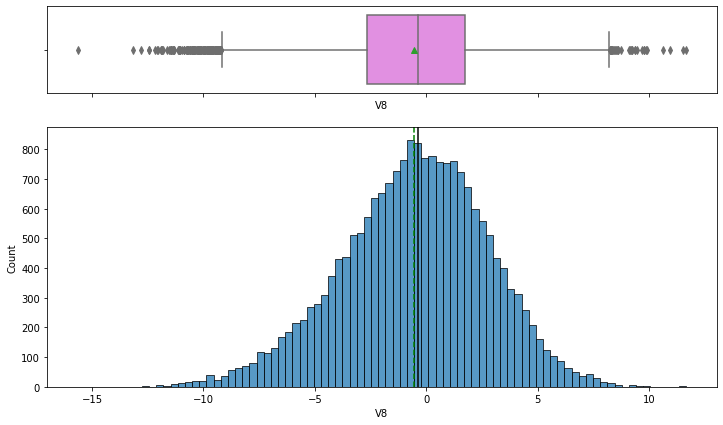

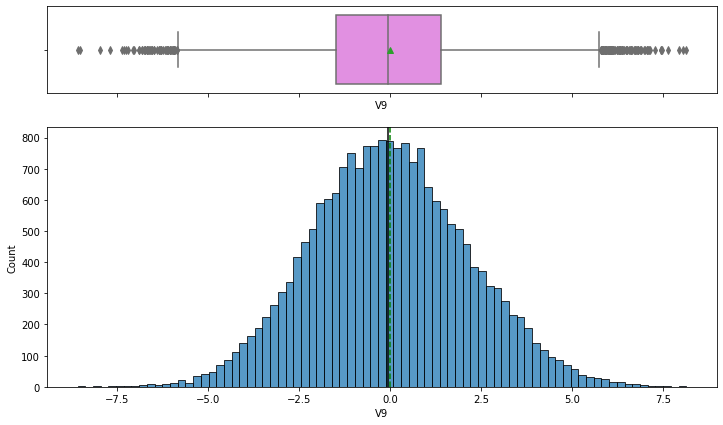

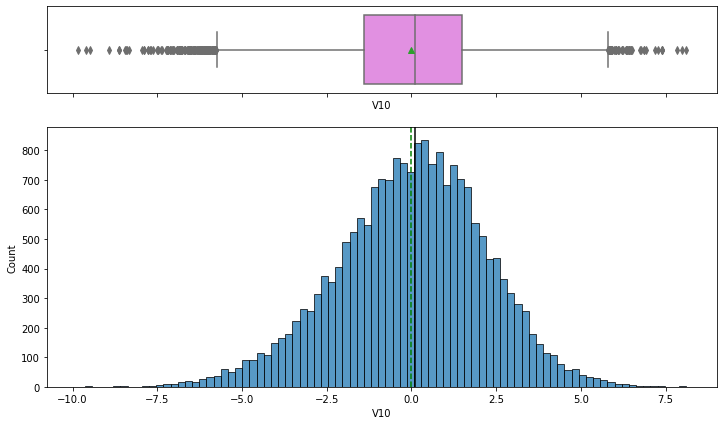

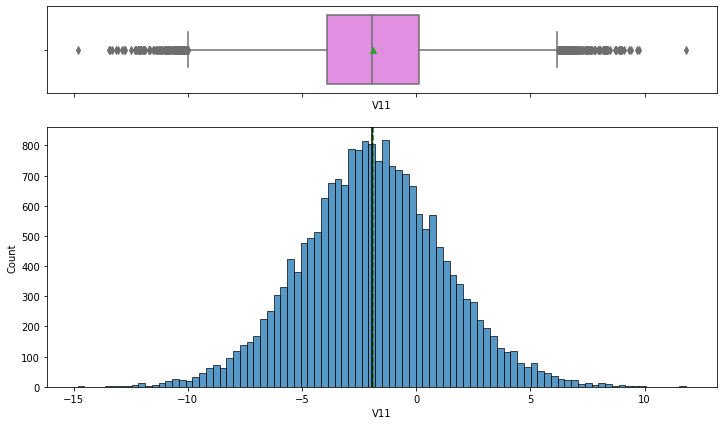

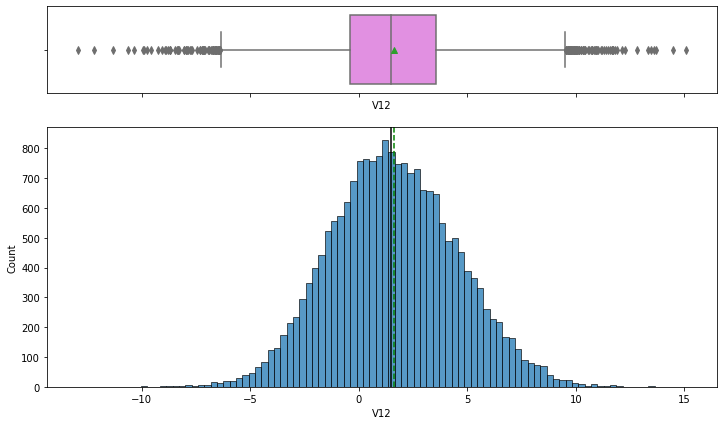

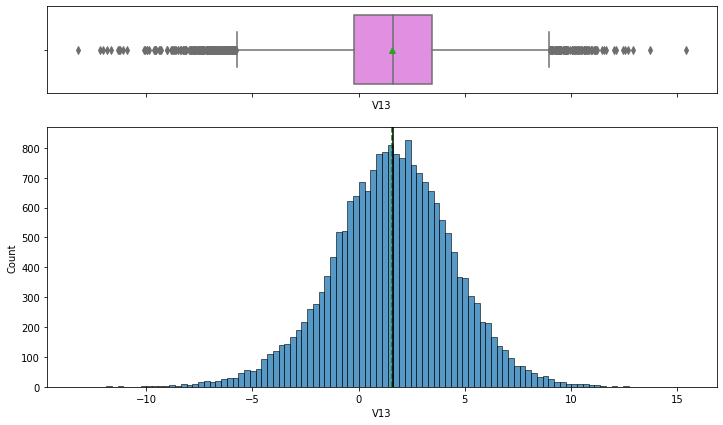

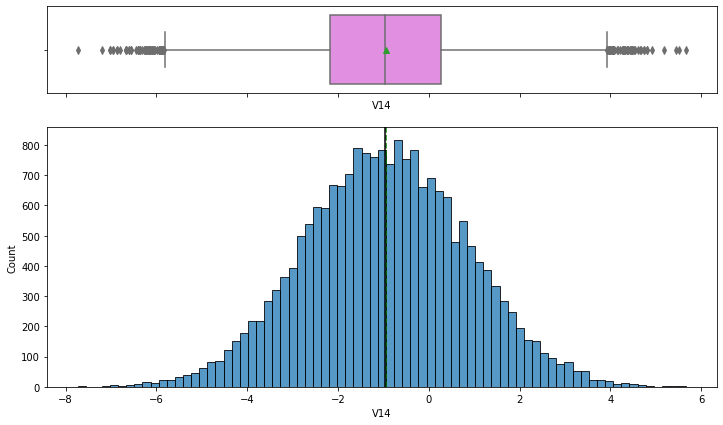

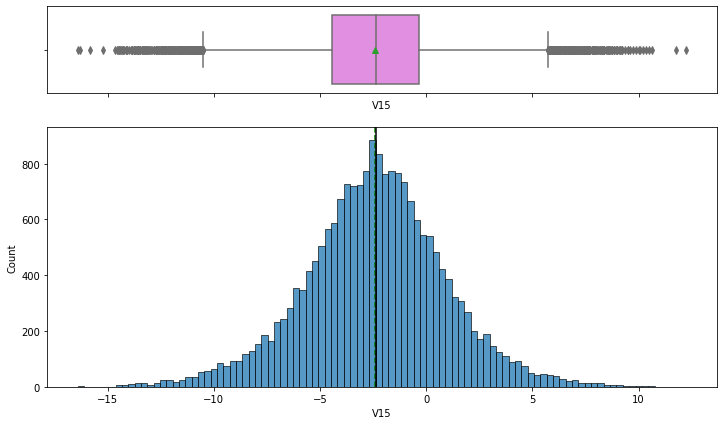

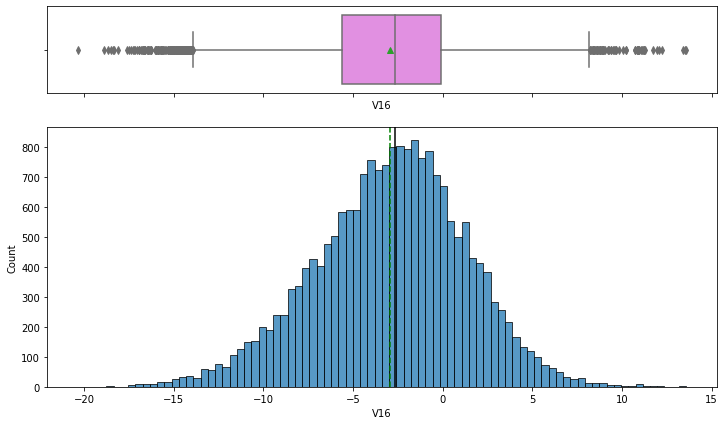

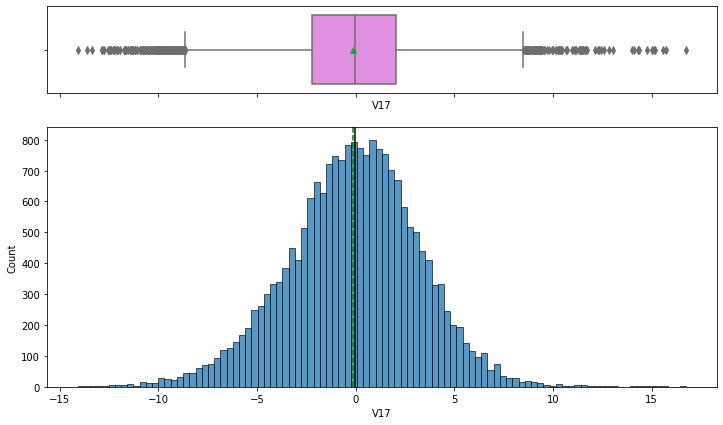

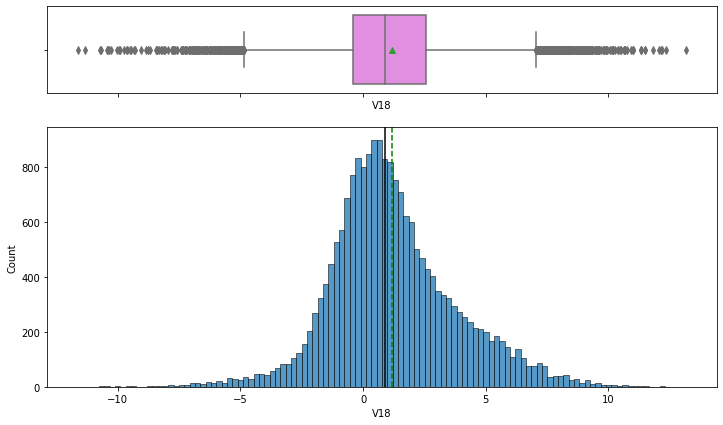

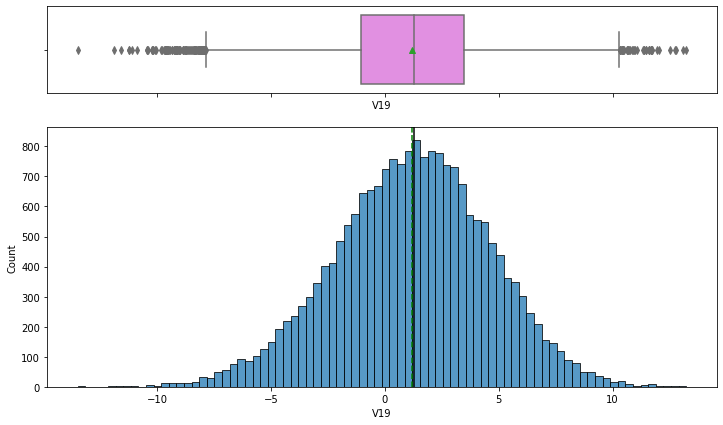

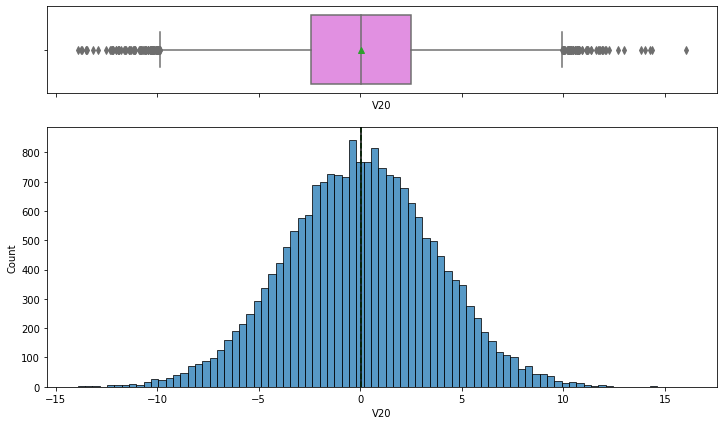

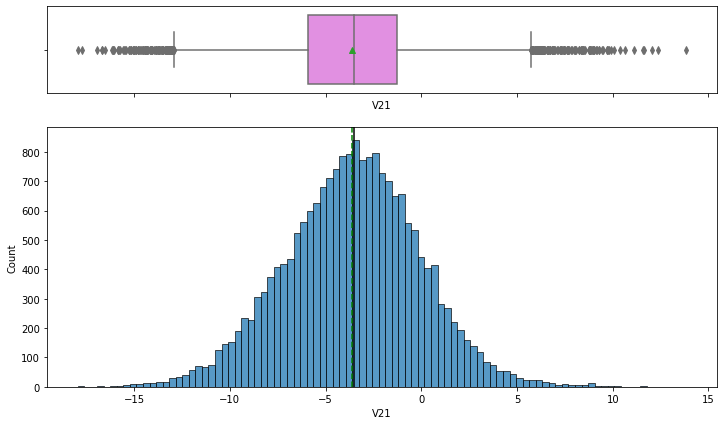

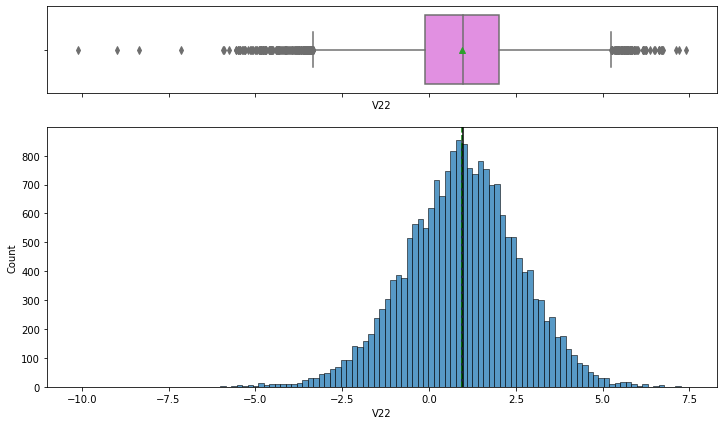

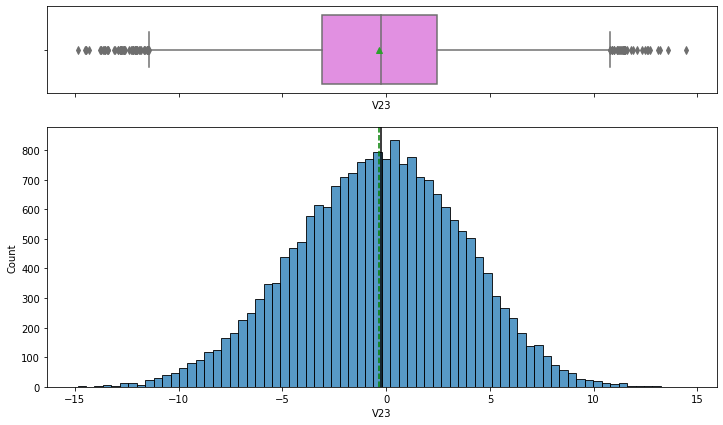

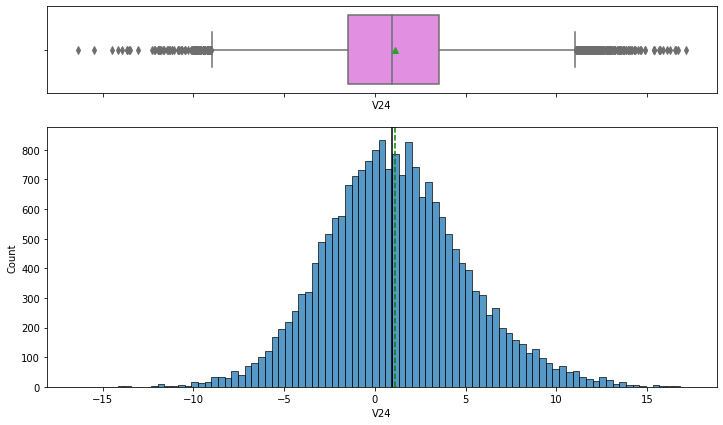

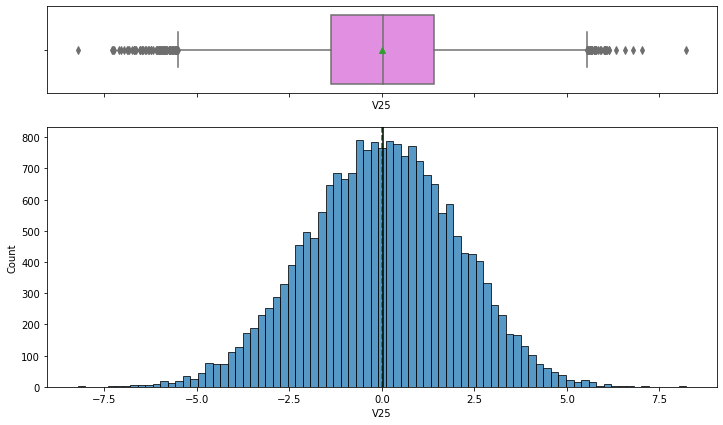

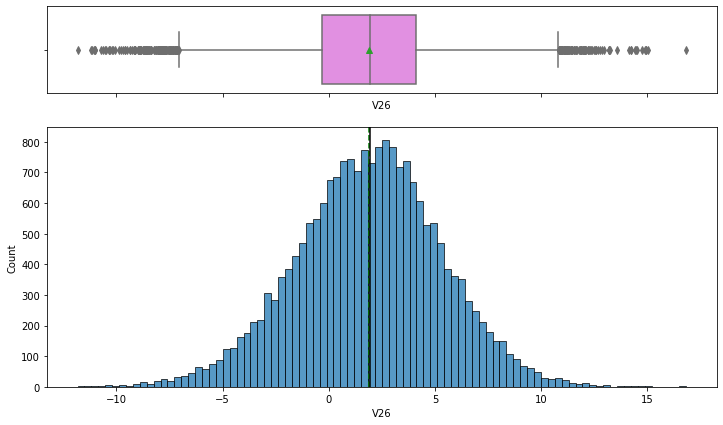

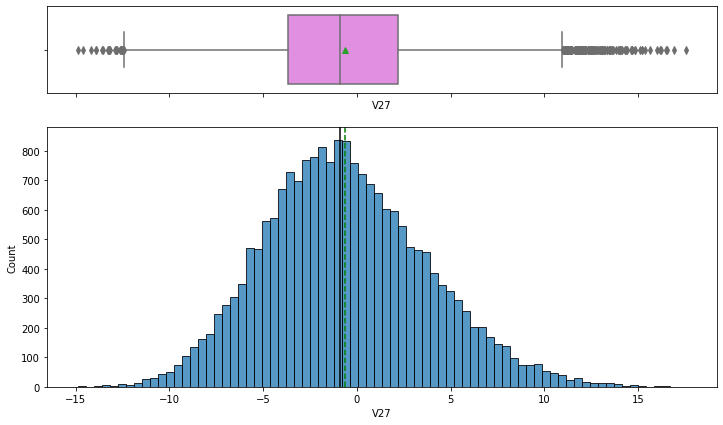

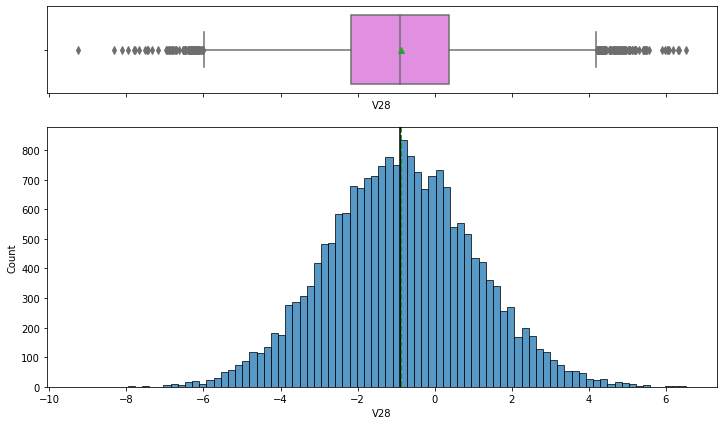

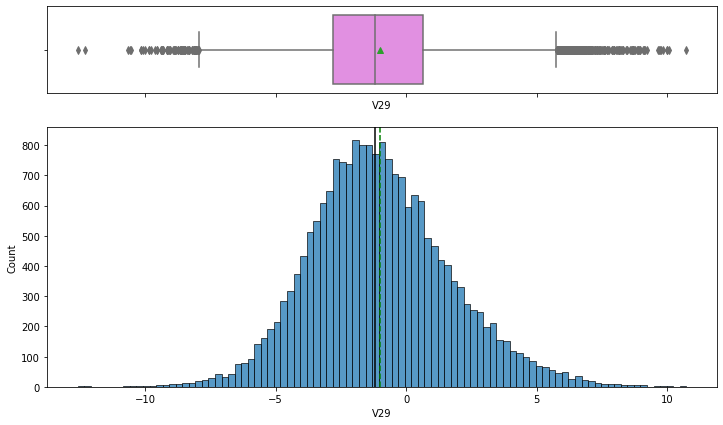

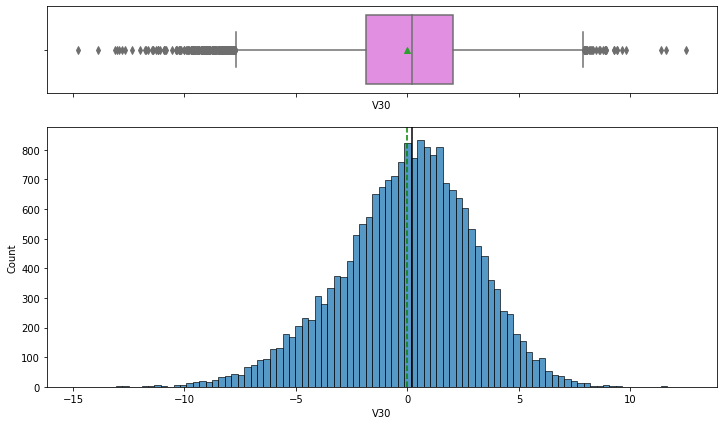

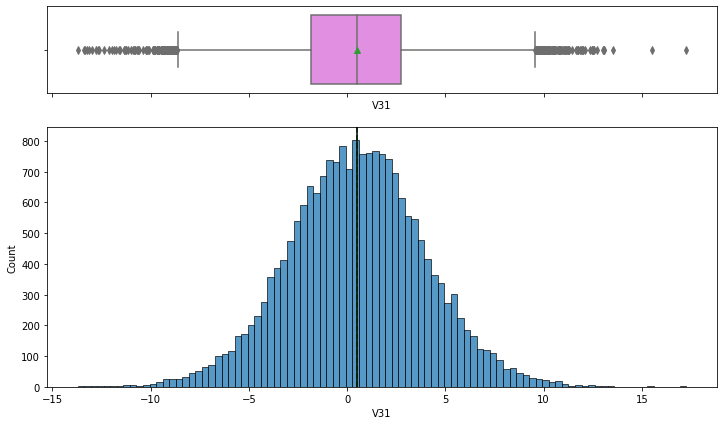

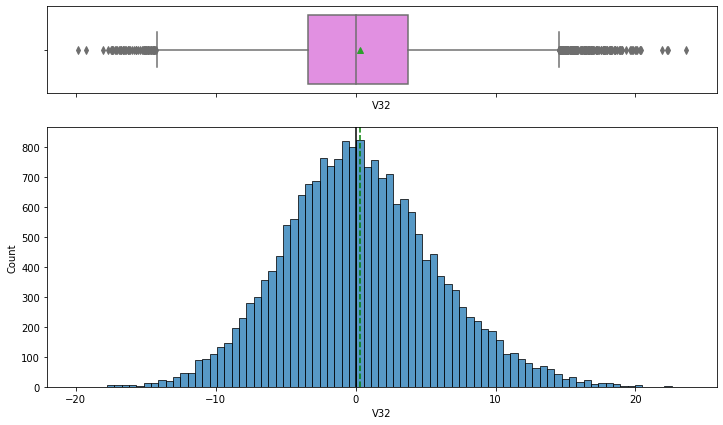

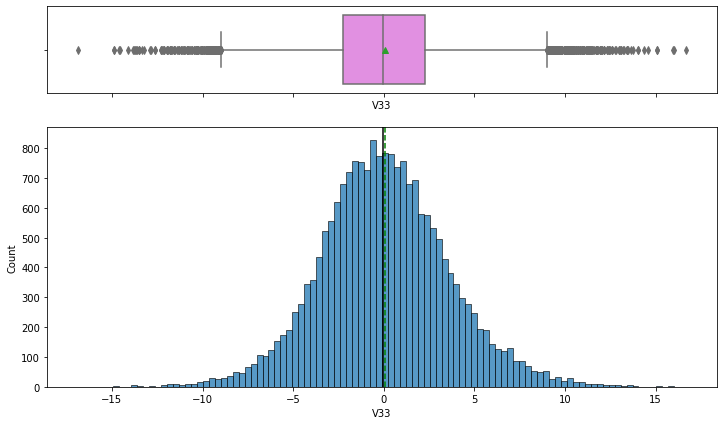

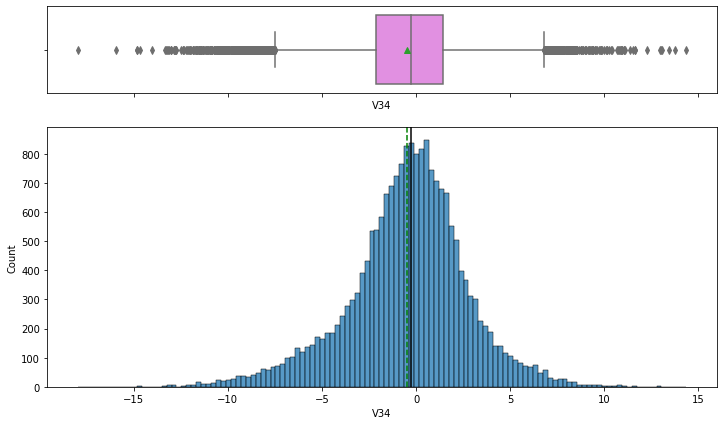

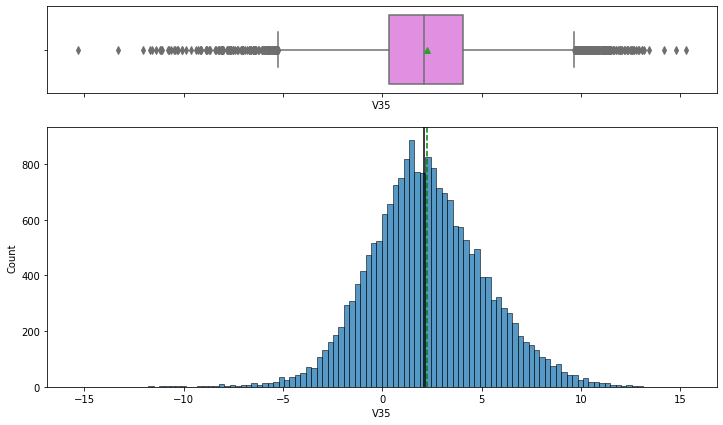

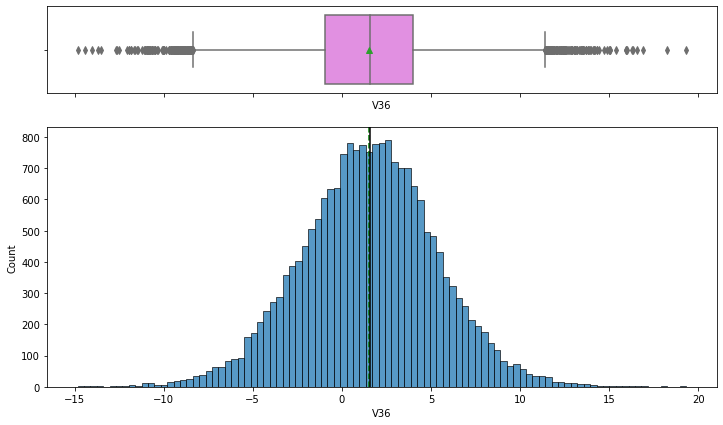

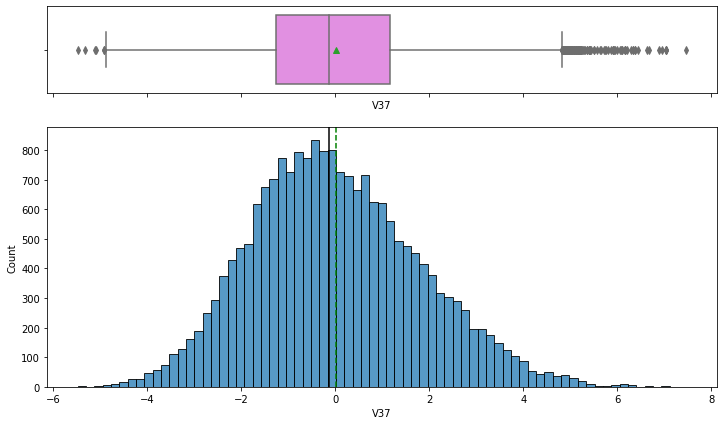

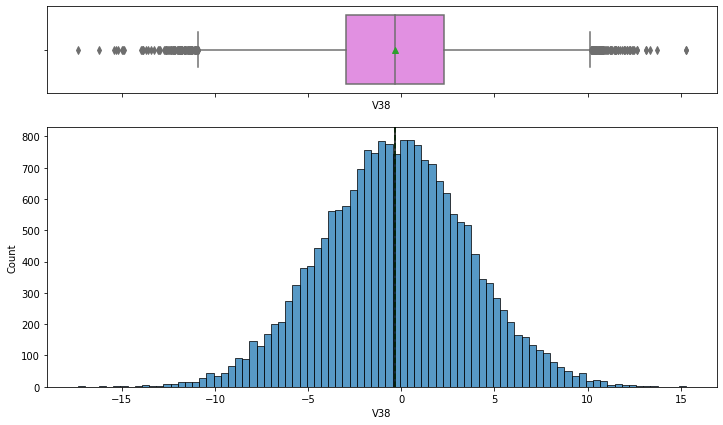

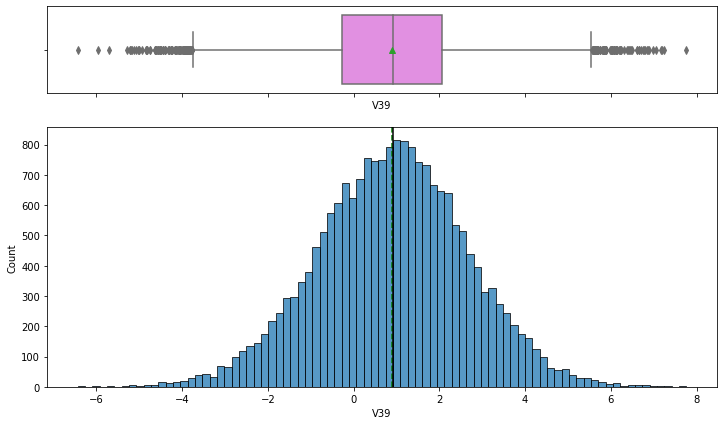

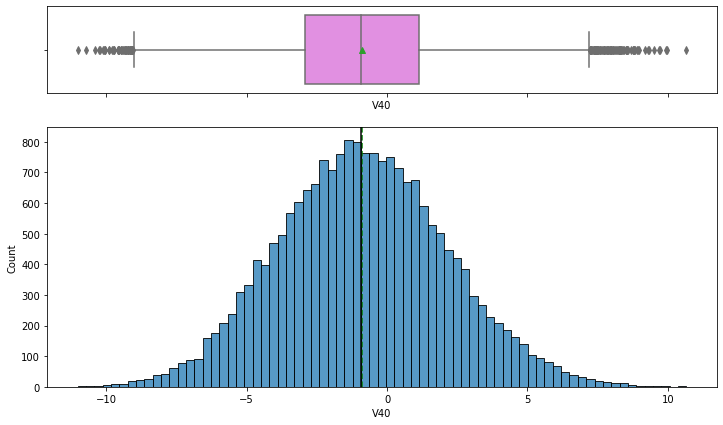

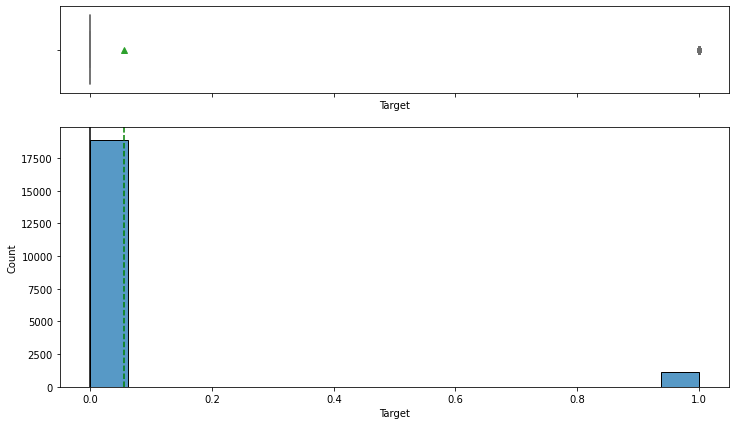

In [ ]:
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None) ## Please change the dataframe name as you define while reading the data

####Observations

1.   It is observed that all the columns are mostly normally distributed.
2.   It is observed that few columns have outliers, which needs to be revisited if they need to be treated.



## Data Pre-processing

In [ ]:
# To check the duplicate values in the train data set

print ("Checking the duplicate values in train data set:", df.duplicated().sum())

Checking the duplicate values in train data set: 0


In [ ]:
# To check the duplicate values in the test data set

print ("Checking the duplicate values in the test data set", df_test.duplicated().sum())

Checking the duplicate values in the test data set 0


In [ ]:
# Splitting the  data into X and y

X = df.drop(
    ["Target"], axis=1
          )

y = df["Target"]

X_test = df_test.drop(
    ["Target"], axis=1
                      )

y_test = df_test["Target"]

In [ ]:
# Splitting data into training and validation set

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

print("Total number of records/columns in train set", X_train.shape,"\n")
print("Total number of records/columns in validation set", X_val.shape,"\n")
print("Total number of records/columns in test set", X_test.shape,"\n")

Total number of records/columns in train set (15000, 40) 

Total number of records/columns in validation set (5000, 40) 

Total number of records/columns in test set (5000, 40) 



In [ ]:
y_train.value_counts(1)

0   0.945
1   0.055
Name: Target, dtype: float64

In [ ]:
y_val.value_counts(1)

0   0.944
1   0.056
Name: Target, dtype: float64

####Observations

1. It is observed that data is highly skewed towards 0 in both the training and validation data.

## Missing value imputation




In [ ]:
# creating an instance of the imputer to be used

imputer = SimpleImputer(strategy="median")

In [ ]:
# Below is the code to Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Below is the code to Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Below is the code to Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [ ]:

# Checking that no column has missing values in train  sets

print( "\n" "Check if any missing values on train data" "\n" ,
      X_train.isna().sum())
print("-" * 30)

# Checking that no column has missing values in validation  sets

print ("\n" "Check if any missing values on validation data:" "\n",
       X_val.isna().sum())
print("-" * 30)

# Checking that no column has missing values in test  sets

print ("\n" "Check if any missing values on test data:" "\n",
       X_test.isna().sum())



Check if any missing values on train data
 V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------

Check if any missing values on validation data:
 V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------

Check if any missing values on test data:
 V1     0
V2     0
V3     0
V4     0
V5     0
V6     0


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

Sample Decision Tree model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("RandomForestClassifier", RandomForestClassifier(random_state=1)))
models.append(("GradientBoostingClassifier", GradientBoostingClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))


Cross-Validation performance on training dataset:

Logistic regression: 0.4927566553639709
Bagging: 0.7210807301060529
dtree: 0.6982829521679532
AdaBoost: 0.6309140754635308
RandomForestClassifier: 0.7235192266070268
GradientBoostingClassifier: 0.7066661857008874
Xgboost: 0.7403217661063415


In [ ]:
print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))


Training Performance:

Logistic regression: 0.4951923076923077
Bagging: 0.9567307692307693
dtree: 1.0
AdaBoost: 0.6586538461538461
RandomForestClassifier: 1.0
GradientBoostingClassifier: 0.8233173076923077
Xgboost: 0.8137019230769231


In [ ]:
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Validation Performance:

Logistic regression: 0.48201438848920863
Bagging: 0.7302158273381295
dtree: 0.7050359712230215
AdaBoost: 0.6762589928057554
RandomForestClassifier: 0.7266187050359713
GradientBoostingClassifier: 0.7230215827338129
Xgboost: 0.762589928057554


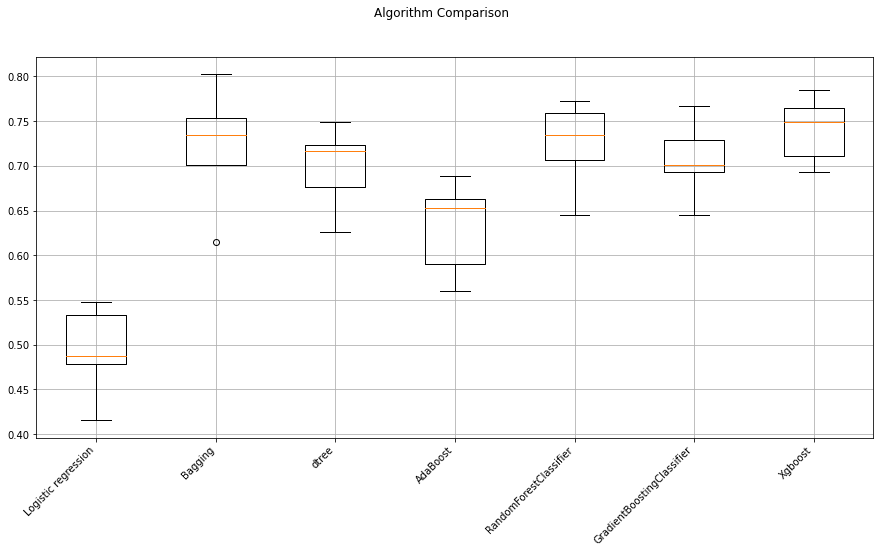

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
plt.xticks(rotation= 45, ha='right');
ax.set_xticklabels(names)

plt.grid()
plt.show()

### Model Building with Oversampled data


In [ ]:
print(
    "Before Oversampling, counts of label '1 (Failures)': {}".format(sum(y_train == 1))
)
print(
    "Before Oversampling, counts of label '0 (No failures)': {} \n".format(
        sum(y_train == 0)
    )
)

Before Oversampling, counts of label '1 (Failures)': 832
Before Oversampling, counts of label '0 (No failures)': 14168 



In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print(
    "Before Oversampling, counts of label '1 (Failures)': {}".format(sum(y_train_over == 1))
)
print(
    "Before Oversampling, counts of label '0 (No failures)': {} \n".format(
        sum(y_train_over == 0)
    )
)

Before Oversampling, counts of label '1 (Failures)': 14168
Before Oversampling, counts of label '0 (No failures)': 14168 



####Observations

1. It is observed that , in order to handle the class imbalance , synthetic minority oversampling is applied to generate synthetic data .

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list

models.append(("Logistic Regression", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


results_over = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models
score_over = []

# loop through all models to get the mean cross validated score

print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results_over.append(cv_result)
    names_over.append(name)
    print("{}: {}".format(name, cv_result.mean()))


Cross-Validation Performance:

Logistic Regression: 0.883963699328486
dtree: 0.9720494245534969
Random forest: 0.9839075260047615
Bagging: 0.9762141471581656
Adaboost: 0.8978689011775473
GBM: 0.9256068151319724
Xgboost: 0.922148207398388


In [ ]:
print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))


Training Performance:

Logistic Regression: 0.8839638622247318
dtree: 1.0
Random forest: 1.0
Bagging: 0.9980942970073405
Adaboost: 0.9026679841897233
GBM: 0.9311829474872954
Xgboost: 0.9261010728402033


In [ ]:
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Validation Performance:

Logistic Regression: 0.8489208633093526
dtree: 0.7769784172661871
Random forest: 0.8489208633093526
Bagging: 0.8345323741007195
Adaboost: 0.8561151079136691
GBM: 0.8776978417266187
Xgboost: 0.8741007194244604


####Observations

1.   It is observed that cross validation metrics for different models are higher than the validation performance metrics and overfitting.
2.   It is observed that  algorithms are overfitting as the trends explain the noise in the alogorithms in training sets and validation sets . This will is not an ideal case for taking these models to production.



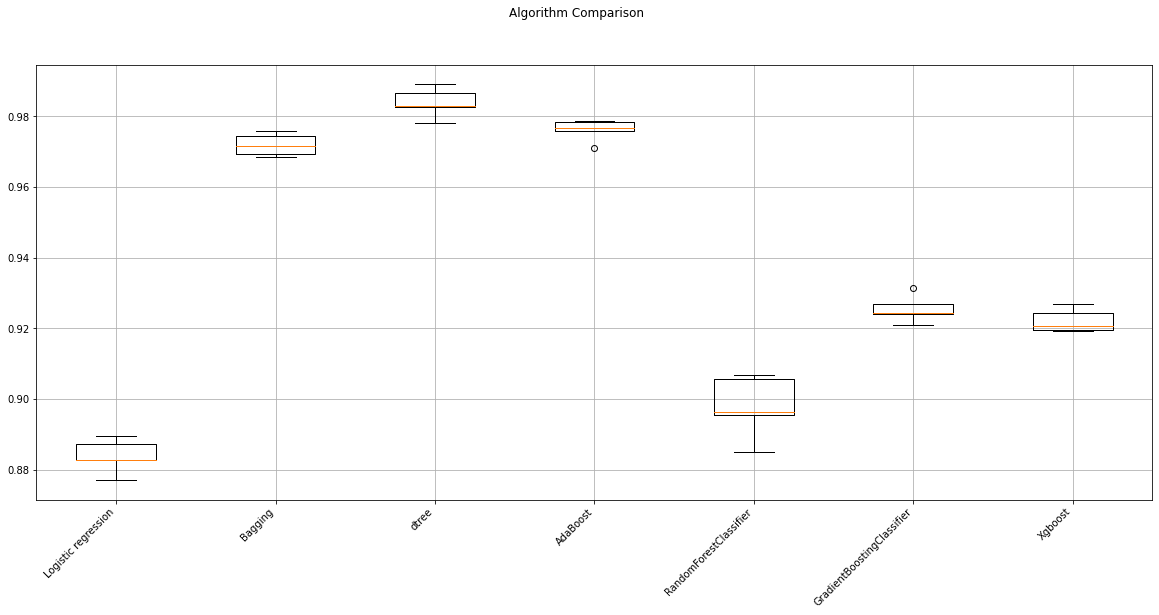

In [ ]:
# Plotting boxplots for CV scores of all models defined above

fig = plt.figure(figsize=(20, 8))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_over)
plt.xticks(rotation= 45, ha='right');
ax.set_xticklabels(names)

plt.grid()
plt.show()

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print(
    "After Undersampling, counts of label '1 (Failures)': {}".format(
        sum(y_train_un == 1)
    )
)
print(
    "After Undersampling, counts of label '0 (No failures)': {} \n".format(
        sum(y_train_un == 0)
    )
)


After Undersampling, counts of label '1 (Failures)': 832
After Undersampling, counts of label '0 (No failures)': 832 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list

models.append(("Logistic Regression", LogisticRegression(solver="newton-cg", random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


results_un = []  # Empty list to store all model's CV scores
names_un = []  # Empty list to store name of the models
score_un = []

# loop through all models to get the mean cross validated score

print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results_un.append(cv_result)
    names_un.append(name)
    print("{}: {}".format(name, cv_result.mean()))


Cross-Validation Performance:

Logistic Regression: 0.8726138085275232
dtree: 0.8617776495202367
Random forest: 0.9038669648654498
Bagging: 0.8641945025611427
Adaboost: 0.8666113556020489
GBM: 0.8990621167303946
Xgboost: 0.9002669360075031


In [ ]:

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))


Training Performance:

Logistic Regression: 0.875
dtree: 1.0
Random forest: 1.0
Bagging: 0.9831730769230769
Adaboost: 0.9050480769230769
GBM: 0.9399038461538461
Xgboost: 0.9290865384615384


In [ ]:
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Validation Performance:

Logistic Regression: 0.8525179856115108
dtree: 0.841726618705036
Random forest: 0.8920863309352518
Bagging: 0.8705035971223022
Adaboost: 0.8489208633093526
GBM: 0.8884892086330936
Xgboost: 0.8884892086330936


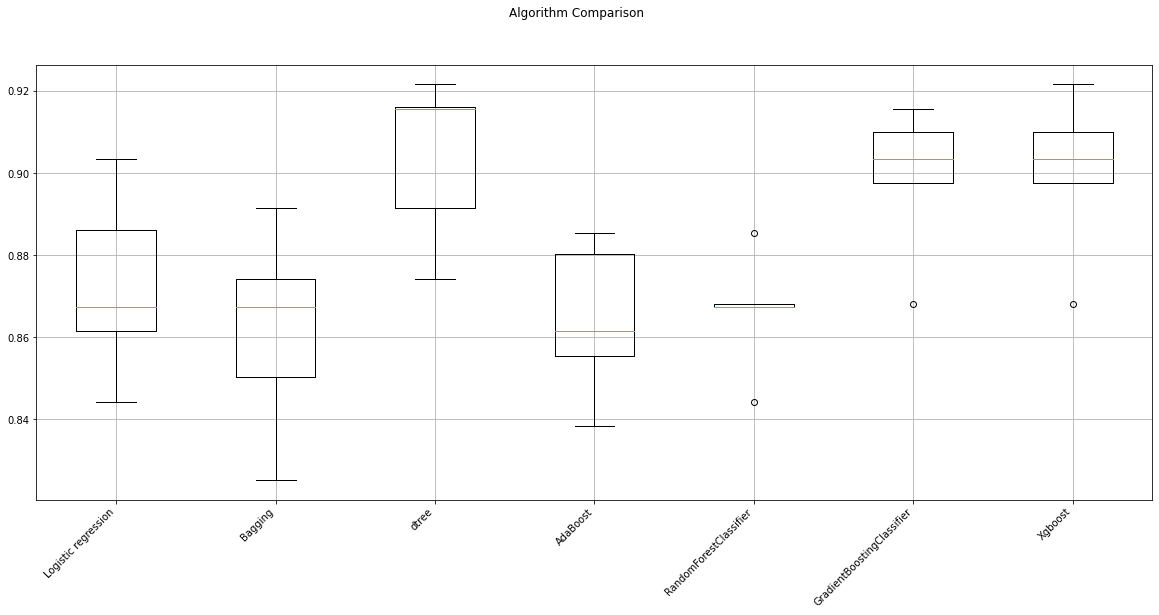

In [ ]:
# Plotting boxplots for CV scores of all models defined above

fig = plt.figure(figsize=(20, 8))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_un)
plt.xticks(rotation= 45, ha='right');
ax.set_xticklabels(names)

plt.grid()
plt.show()

####Observations

1.   It is observed that  algorithms are able to give better performance on the cross validation training scores on undersampled dataset in comparison to original dataset as can be seen from the boxplots. However, the issue is the lack of generalizatbility in carrying the performance to the validation set.



## HyperparameterTuning

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Sample tuning method for Decision tree with original data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.5684366207344347:


In [ ]:
# building model with best parameters
dt_tuned = DecisionTreeClassifier(min_samples_leaf=7,
                                  min_impurity_decrease=0.0001,
                                  max_leaf_nodes=15,
                                  max_depth=5,
                                  random_state=1)

# Fit the model on training data
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

In [ ]:
# Calculating different metrics on training set
Model_dt_OData_tuned_Trng = model_performance_classification_sklearn(
    dt_tuned, X_train, y_train
)
print("Training performance:")
Model_dt_OData_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.974,0.591,0.904,0.715


In [ ]:
# Calculating different metrics on validation set
Model_dt_OData_tuned_vldtn = model_performance_classification_sklearn(
    dt_tuned, X_val, y_val
)
print("Validation performance:")
Model_dt_OData_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.970,0.583,0.822,0.682


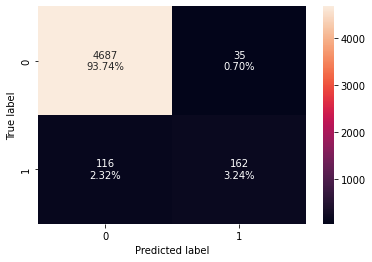

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(dt_tuned,X_val, y_val)

####Observations:

1.   It is observed that Decision tree classifier with random search is having good recall score and check if any scope for improvement.




### Tuning method for Bagging Classifier with original data

In [ ]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid =  { 'max_samples': [0.8,0.9,1],
               'max_features': [0.7,0.8,0.9],
               'n_estimators' : [30,50,70] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.9} with CV score=0.7308563595700166:


In [ ]:
# building model with best parameters
Bgng_clsfr_OData_tuned = BaggingClassifier(n_estimators=70,
                                     max_samples= 0.8,
                                     max_features=0.9,
                                     random_state=1)

# Fit the model on training data
Bgng_clsfr_OData_tuned.fit(X_train, y_train)


BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=70,
                  random_state=1)

In [ ]:
# Calculating different metrics on training set
Model_bgng_clsfr_OData_tuned_Trng = model_performance_classification_sklearn(
    Bgng_clsfr_OData_tuned, X_train, y_train
)
print("Training performance:")
Model_bgng_clsfr_OData_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.999,0.978,1.000,0.989


In [ ]:
# Calculating different metrics on Validation set
Model_bgng_clsfr_OData_tuned_vldtn = model_performance_classification_sklearn(
    Bgng_clsfr_OData_tuned, X_val, y_val
)
print("Validation performance:")
Model_bgng_clsfr_OData_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.984,0.737,0.958,0.833


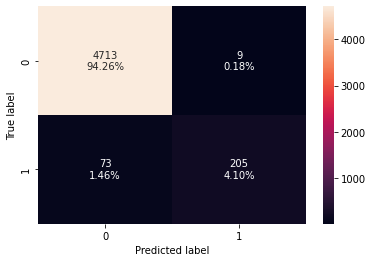

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(Bgng_clsfr_OData_tuned,X_val, y_val)

####Observations:

1. It is observed that Bagging Classifier on original dataset is overfitting as the recall between training and validation set is high.

### Tuning method for GradientBoosting Classifier with original data

In [ ]:
# defining model

Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
              "subsample":[0.5,0.7],
              "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.754895029218671:


In [ ]:
# building model with best parameters
Grdnt_clsfr_OData_tuned = GradientBoostingClassifier(subsample=0.7,
                                            n_estimators=125,
                                            learning_rate= 0.2,
                                            max_features=0.5,
                                            random_state=1)

# Fit the model on training data
Grdnt_clsfr_OData_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.7)

In [ ]:
# Calculating different metrics on training set
Model_Grdnt_clsfr_OData_tuned_Trng = model_performance_classification_sklearn(
    Grdnt_clsfr_OData_tuned, X_train, y_train
)
print("Training performance:")
Model_Grdnt_clsfr_OData_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.994,0.906,0.986,0.944


In [ ]:
# Calculating different metrics on Validation set
Model_Grdnt_clsfr_OData_tuned_vldtn = model_performance_classification_sklearn(
    Grdnt_clsfr_OData_tuned, X_val, y_val
)
print("Validation performance:")
Model_Grdnt_clsfr_OData_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.982,0.766,0.891,0.824


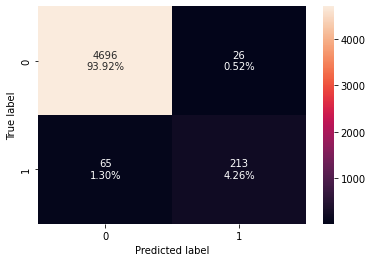

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(Grdnt_clsfr_OData_tuned,X_val, y_val)

####Observations:

1. It is observed that recall is overfitting between the training and validation set , but the accuracy is great.

### Tuning method for AdaBoost Classifier with original data

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [100, 150, 200],
              "learning_rate": [0.2, 0.05],
              "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1), ] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7632566192915374:


In [ ]:
# building model with best parameters
Adabst_clsfr_OData_tuned = AdaBoostClassifier(
                                            n_estimators=200,
                                            learning_rate= 0.2,
                                            base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1),
                                            random_state=1)

# Fit the model on training data
Adabst_clsfr_OData_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200, random_state=1)

In [ ]:
# Calculating different metrics on training set
Model_Adabst_clsfr_OData_tuned_Trng = model_performance_classification_sklearn(
    Adabst_clsfr_OData_tuned, X_train, y_train
)
print("Training performance:")
Model_Adabst_clsfr_OData_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.999,0.984,1.000,0.992


In [ ]:
# Calculating different metrics on Validation set
Model_Adabst_clsfr_OData_tuned_vldtn = model_performance_classification_sklearn(
    Adabst_clsfr_OData_tuned, X_val, y_val
)
print("Validation performance:")
Model_Adabst_clsfr_OData_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.986,0.763,0.972,0.855


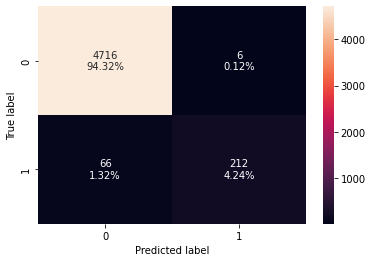

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(Adabst_clsfr_OData_tuned,X_val, y_val)

####Observations

1. It is observed that Precision is high , but is overfitting the model.

### Tuning method for RandomForest Classifier with original data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300],
              "min_samples_leaf": np.arange(1, 4),
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.6996248466921577:


In [ ]:
# building model with best parameters
Rndmfrst_clsfr_OData_tuned = RandomForestClassifier(
                                            n_estimators=250,
                                            min_samples_leaf= 1,
                                            max_samples=0.6,
                                            max_features='sqrt',
                                            random_state=1)

# Fit the model on training data
Rndmfrst_clsfr_OData_tuned.fit(X_train, y_train)# building model with best parameters

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250,
                       random_state=1)

In [ ]:
# Calculating different metrics on training set
Model_Rndmfrst_clsfr_OData_tuned_Trng = model_performance_classification_sklearn(
    Rndmfrst_clsfr_OData_tuned, X_train, y_train
)
print("Training performance:")
Model_Rndmfrst_clsfr_OData_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.995,0.909,1.000,0.952


In [ ]:
# Calculating different metrics on Validation set
Model_Rndmfrst_clsfr_OData_tuned_vldtn = model_performance_classification_sklearn(
    Rndmfrst_clsfr_OData_tuned, X_val, y_val
)
print("Validation performance:")
Model_Rndmfrst_clsfr_OData_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.983,0.712,0.985,0.827


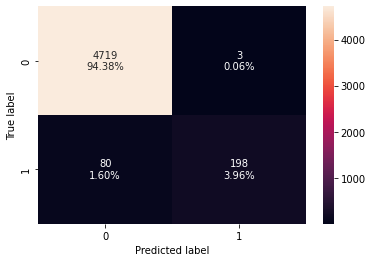

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(Rndmfrst_clsfr_OData_tuned,X_val, y_val)

####Observations

1.   It is observed that RandomForestClassifier on original dataset is overfitting.




### Tuning method for Logistic Regression  with original data

In [ ]:
# defining model
Model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'C': np.arange(0.1,1.1,0.1)}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'C': 0.2} with CV score=0.4952240098117019:


In [ ]:
# building model with best parameters
LgstcRgrsn_clsfr_OData_tuned = LogisticRegression(
                                            C=0.2,
                                            random_state=1)

# Fit the model on training data
LgstcRgrsn_clsfr_OData_tuned.fit(X_train, y_train)

LogisticRegression(C=0.2, random_state=1)

In [ ]:
# Calculating different metrics on training set
Model_LgstcRgrsn_clsfr_OData_tuned_Trng = model_performance_classification_sklearn(
    LgstcRgrsn_clsfr_OData_tuned, X_train, y_train
)
print("Training performance:")
Model_LgstcRgrsn_clsfr_OData_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.967,0.495,0.844,0.624


In [ ]:
# Calculating different metrics on Validation set
Model_LgstcRgrsn_clsfr_OData_tuned_vldtn = model_performance_classification_sklearn(
    LgstcRgrsn_clsfr_OData_tuned, X_val, y_val
)
print("Validation performance:")
Model_LgstcRgrsn_clsfr_OData_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.966,0.482,0.843,0.613


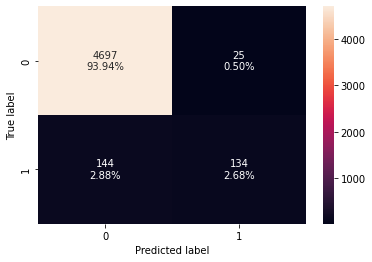

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(LgstcRgrsn_clsfr_OData_tuned,X_val, y_val)

####Observations

1. It is observed that Logistic regression model has the good recall between the training and validation data.

### Tuning method for XGBOOST Classifier with original data

In [ ]:
# defining model
Model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [150, 200, 250],
            'scale_pos_weight': [5,10],
            'learning_rate': [0.1,0.2],
            'gamma': [0,3,5],
            'subsample': [0.8,0.9] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.8630329702041699:


In [ ]:
# building model with best parameters
XGBST_clsfr_OData_tuned = XGBClassifier(
                                          subsample=0.8,
                                          scale_pos_weight=10,
                                          n_estimators=200,
                                          learning_rate=0.1,
                                          gamma=5)

# Fit the model on training data
XGBST_clsfr_OData_tuned.fit(X_train, y_train)

XGBClassifier(gamma=5, n_estimators=200, scale_pos_weight=10, subsample=0.8)

In [ ]:
# Calculating different metrics on training set
Model_XGBST_clsfr_OData_tuned_Trng = model_performance_classification_sklearn(
    XGBST_clsfr_OData_tuned, X_train, y_train
)
print("Training performance:")
Model_XGBST_clsfr_OData_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.993,0.963,0.909,0.935


In [ ]:
# Calculating different metrics on Validation set
Model_XGBST_clsfr_OData_tuned_vldtn = model_performance_classification_sklearn(
    XGBST_clsfr_OData_tuned, X_val, y_val
)
print("Validation performance:")
Model_XGBST_clsfr_OData_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.983,0.845,0.845,0.845


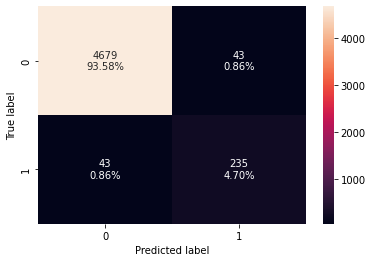

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(XGBST_clsfr_OData_tuned,X_val, y_val)

####Observations

1. It is observed that XGBOOST Classifier with original data is overfitting the model.

# Sample tuning method for Decision tree with oversampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.9102913265648006:


In [ ]:
# building model with best parameters
dt_tuned_ovrsmpl = DecisionTreeClassifier(min_samples_leaf=7,
                                  min_impurity_decrease=0.001,
                                  max_leaf_nodes=15,
                                  max_depth=3,
                                  random_state=1)

# Fit the model on training data
dt_tuned_ovrsmpl.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=7,
                       random_state=1)

In [ ]:
# Calculating different metrics on training set
Model_dt_ovrsmpl_tuned_Trng = model_performance_classification_sklearn(
    dt_tuned_ovrsmpl, X_train_over, y_train_over
)
print("Training performance:")
Model_dt_ovrsmpl_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.843,0.917,0.799,0.854


In [ ]:
# Calculating different metrics on validation set
Model_dt_ovrsmpl_tuned_vldtn = model_performance_classification_sklearn(
    dt_tuned_ovrsmpl, X_val, y_val
)
print("Validation performance:")
Model_dt_ovrsmpl_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.763,0.885,0.176,0.294


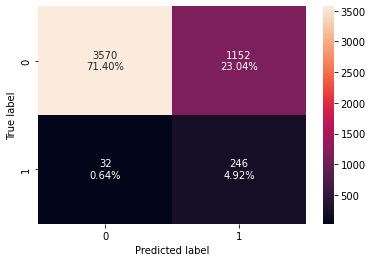

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(dt_tuned_ovrsmpl,X_val, y_val)

####Observations

1. It is observed that Decision Tree Model with oversampling is performing bad and recall has overfitting.

### Tuning method for Bagging Classifier  with oversampled data

In [ ]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid =  { 'max_samples': [0.8,0.9,1],
               'max_features': [0.7,0.8,0.9],
               'n_estimators' : [30,50,70] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.9828488269988673:


In [ ]:
# building model with best parameters
Model_bgng_clsfr_ovrsmpl_tuned = BaggingClassifier(n_estimators=70,
                                  max_samples=0.9,
                                  max_features=0.8,
                                  random_state=1)

# Fit the model on training data
Model_bgng_clsfr_ovrsmpl_tuned.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=70,
                  random_state=1)

In [ ]:

# Calculating different metrics on training set
Model_bgng_clsfr_ovrsmpl_tuned_Trng = model_performance_classification_sklearn(
    Model_bgng_clsfr_ovrsmpl_tuned, X_train_over, y_train_over
)
print("Training performance:")
Model_bgng_clsfr_ovrsmpl_tuned_Trng


Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:

# Calculating different metrics on validation set
Model_bgng_clsfr_ovrsmpl_tuned_vldtn = model_performance_classification_sklearn(
    Model_bgng_clsfr_ovrsmpl_tuned, X_val, y_val
)
print("Validation performance:")
Model_bgng_clsfr_ovrsmpl_tuned_vldtn


Validation performance:


,Accuracy,Recall,Precision,F1
0,0.986,0.867,0.883,0.875


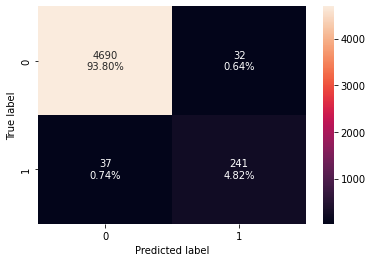

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(Model_bgng_clsfr_ovrsmpl_tuned,X_val, y_val)

####Observations

1. It is observed that bagging classifier with oversample data is overfitting between the training and validation .

###Tuning method for Gradient Boosting tree with oversampled data

In [ ]:
# defining model

Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
              "subsample":[0.5,0.7],
              "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9723322092856124:


In [ ]:
# building model with best parameters
Grdnt_clsfr_ovrsmpl_tuned = GradientBoostingClassifier(subsample=0.7,
                                            n_estimators=125,
                                            learning_rate= 1,
                                            max_features=0.5,
                                            random_state=1)

# Fit the model on training data
Grdnt_clsfr_ovrsmpl_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           random_state=1, subsample=0.7)

In [ ]:
# Calculating different metrics on training set
Model_Grdnt_clsfr_ovrsmpl_tuned_Trng = model_performance_classification_sklearn(
    Grdnt_clsfr_ovrsmpl_tuned, X_train_over, y_train_over
)
print("Training performance:")
Model_Grdnt_clsfr_ovrsmpl_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.993,0.992,0.994,0.993


In [ ]:
# Calculating different metrics on Validation set
Model_Grdnt_clsfr_ovrsmpl_tuned_vldtn = model_performance_classification_sklearn(
    Grdnt_clsfr_ovrsmpl_tuned, X_val, y_val
)
print("Validation performance:")
Model_Grdnt_clsfr_ovrsmpl_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.969,0.856,0.678,0.757


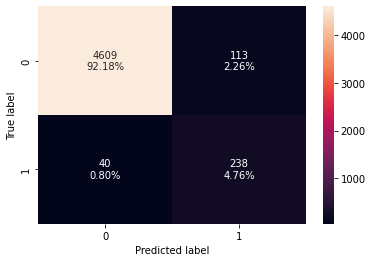

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(Grdnt_clsfr_ovrsmpl_tuned,X_val, y_val)

####Observations

1. It is observed that precision for the gradient boost has improved with the oversampled data for the training and validation set.

###Tuning method for AdaBoosting Classifier tree with oversampled data

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [100, 150, 200],
              "learning_rate": [0.2, 0.05],
              "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1), ] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9715559462639259:


In [ ]:
# building model with best parameters
Adabst_clsfr_ovrsmpl_tuned = AdaBoostClassifier(
                                            n_estimators=200,
                                            learning_rate= 0.2,
                                            base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1),
                                            random_state=1)

# Fit the model on training data
Adabst_clsfr_ovrsmpl_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200, random_state=1)

In [ ]:
# Calculating different metrics on training set
Model_Adabst_clsfr_ovrsmpl_tuned_Trng = model_performance_classification_sklearn(
    Adabst_clsfr_ovrsmpl_tuned, X_train_over, y_train_over
)
print("Training performance:")
Model_Adabst_clsfr_ovrsmpl_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.992,0.988,0.995,0.992


In [ ]:
# Calculating different metrics on Validation set
Model_Adabst_clsfr_ovrsmpl_tuned_vldtn = model_performance_classification_sklearn(
    Adabst_clsfr_ovrsmpl_tuned, X_val, y_val
)
print("Validation performance:")
Model_Adabst_clsfr_ovrsmpl_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.979,0.853,0.790,0.820


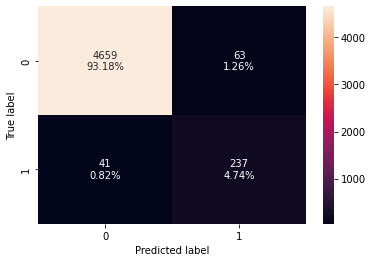

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(Adabst_clsfr_ovrsmpl_tuned,X_val, y_val)

####Observations

1. It is observed that overfitting exists  beteen the training and validation set , interestingly the recall has improved.

###Tuning method for RandomForest Classifier tree with oversampled data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300],
              "min_samples_leaf": np.arange(1, 4),
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9815078165615898:


In [ ]:
# building model with best parameters
Rndmfrst_clsfr_ovrsmpl_tuned = RandomForestClassifier(
                                            n_estimators=300,
                                            min_samples_leaf= 1,
                                            max_samples= 0.6,
                                            max_features='sqrt',
                                            random_state=1)

# Fit the model on training data
Rndmfrst_clsfr_ovrsmpl_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=300,
                       random_state=1)

In [ ]:
# Calculating different metrics on training set
Model_Rndmfrst_clsfr_ovrsmpl_tuned_Trng = model_performance_classification_sklearn(
    Rndmfrst_clsfr_ovrsmpl_tuned, X_train_over, y_train_over
)
print("Training performance:")
Model_Rndmfrst_clsfr_ovrsmpl_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,0.999,1.000,1.000


In [ ]:
# Calculating different metrics on Validation set
Model_Rndmfrst_clsfr_ovrsmpl_tuned_vldtn = model_performance_classification_sklearn(
    Rndmfrst_clsfr_ovrsmpl_tuned, X_val, y_val
)
print("Validation performance:")
Model_Rndmfrst_clsfr_ovrsmpl_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.988,0.860,0.926,0.892


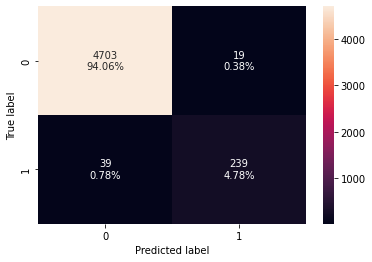

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(Rndmfrst_clsfr_ovrsmpl_tuned,X_val, y_val)

####Observation

1. It is observed that Recall and Precision are performing good but still see overfitting data between the training and validation set.



###Tuning method for Logistic Regression tree with oversampled data

In [ ]:
# defining model
Model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'C': np.arange(0.1,1.1,0.1)}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'C': 0.1} with CV score=0.8838231041005031:


In [ ]:
# building model with best parameters
LgstcRgrsn_clsfr_ovrsmpl_tuned = LogisticRegression(
                                            C=0.1,
                                            random_state=1)

# Fit the model on training data
LgstcRgrsn_clsfr_ovrsmpl_tuned.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1)

In [ ]:
# Calculating different metrics on training set
Model_LgstcRgrsn_clsfr_ovrsmpl_tuned_Trng = model_performance_classification_sklearn(
    LgstcRgrsn_clsfr_ovrsmpl_tuned, X_train_over, y_train_over
)
print("Training performance:")
Model_LgstcRgrsn_clsfr_ovrsmpl_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.880,0.884,0.878,0.881


In [ ]:
# Calculating different metrics on Validation set
Model_LgstcRgrsn_clsfr_ovrsmpl_tuned_vldtn = model_performance_classification_sklearn(
    LgstcRgrsn_clsfr_ovrsmpl_tuned, X_val, y_val
)
print("Validation performance:")
Model_LgstcRgrsn_clsfr_ovrsmpl_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.868,0.849,0.277,0.418


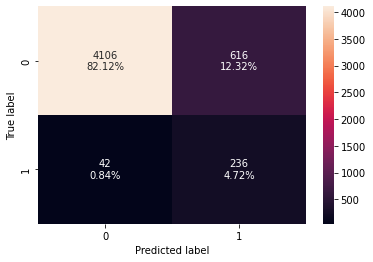

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(LgstcRgrsn_clsfr_ovrsmpl_tuned,X_val, y_val)

####Observation

1. It is observed that Logistic regression is overfitting but performing good.

###Tuning method for XGBOOST Classifier with oversampled data

In [ ]:
# defining model
Model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [150, 200, 250],
            'scale_pos_weight': [5,10],
            'learning_rate': [0.1,0.2],
            'gamma': [0,3,5],
            'subsample': [0.8,0.9] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.2, 'gamma': 0} with CV score=0.9946358835191953:


In [ ]:
# building model with best parameters
XGBST_clsfr_ovrsmpl_tuned = XGBClassifier(
                                          subsample=0.9,
                                          scale_pos_weight=10,
                                          n_estimators=200,
                                          learning_rate=0.2,
                                          gamma=0)

# Fit the model on training data
XGBST_clsfr_ovrsmpl_tuned.fit(X_train_over, y_train_over)

XGBClassifier(learning_rate=0.2, n_estimators=200, scale_pos_weight=10,
              subsample=0.9)

In [ ]:
# Calculating different metrics on training set
Model_XGBST_clsfr_ovrsmpl_tuned_Trng = model_performance_classification_sklearn(
    XGBST_clsfr_ovrsmpl_tuned, X_train, y_train
)
print("Training performance:")
Model_XGBST_clsfr_ovrsmpl_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.940,1.000,0.480,0.649


In [ ]:
# Calculating different metrics on Validation set
Model_XGBST_clsfr_ovrsmpl_tuned_vldtn = model_performance_classification_sklearn(
    XGBST_clsfr_ovrsmpl_tuned, X_val, y_val
)
print("Validation performance:")
Model_XGBST_clsfr_ovrsmpl_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.916,0.881,0.388,0.539


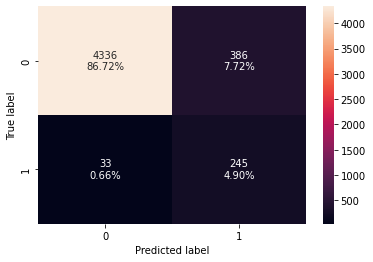

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(XGBST_clsfr_ovrsmpl_tuned,X_val, y_val)

####Observation

1. It is observed that even if the XGBOOST has increase in the recall , but still overfitting.

###Tuning method for Decision tree with undersampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 2} with CV score=0.850811629752543:


In [ ]:
# building model with best parameters
dt_tuned_undrsmpl = DecisionTreeClassifier(min_samples_leaf=1,
                                  min_impurity_decrease=0.001,
                                  max_leaf_nodes=5,
                                  max_depth=2,
                                  random_state=1)

# Fit the model on training data
dt_tuned_undrsmpl.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

In [ ]:
# Calculating different metrics on training set
Model_dt_undrsmpl_tuned_Trng = model_performance_classification_sklearn(
    dt_tuned_undrsmpl, X_train_un, y_train_un
)
print("Training performance:")
Model_dt_undrsmpl_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.764,0.909,0.705,0.794


In [ ]:
# Calculating different metrics on validation set
Model_dt_undrsmpl_tuned_vldtn = model_performance_classification_sklearn(
    dt_tuned_undrsmpl, X_val, y_val
)
print("Validation performance:")
Model_dt_undrsmpl_tuned_vldtn


Validation performance:


,Accuracy,Recall,Precision,F1
0,0.609,0.888,0.114,0.202


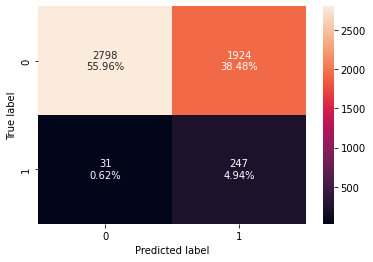

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(dt_tuned_undrsmpl,X_val, y_val)


###Tuning method for XGBOOST Classifier with undersampled data

In [ ]:
# defining model
Model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [150, 200, 250],
            'scale_pos_weight': [5,10],
            'learning_rate': [0.1,0.2],
            'gamma': [0,3,5],
            'subsample': [0.8,0.9] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9302719861481856:


In [ ]:
# building model with best parameters
XGBST_clsfr_undrsmpl_tuned = XGBClassifier(
                                          subsample=0.9,
                                          scale_pos_weight=10,
                                          n_estimators=200,
                                          learning_rate=0.1,
                                          gamma=5)

# Fit the model on training data
XGBST_clsfr_undrsmpl_tuned.fit(X_train_un, y_train_un)

XGBClassifier(gamma=5, n_estimators=200, scale_pos_weight=10, subsample=0.9)

In [ ]:
# Calculating different metrics on training set
Model_XGBST_clsfr_undrsmpl_tuned_Trng = model_performance_classification_sklearn(
    XGBST_clsfr_undrsmpl_tuned, X_train_un, y_train_un
)
print("Training performance:")
Model_XGBST_clsfr_undrsmpl_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.971,1.000,0.944,0.971


In [ ]:
# Calculating different metrics on Validation set
Model_XGBST_clsfr_undrsmpl_tuned_vldtn = model_performance_classification_sklearn(
    XGBST_clsfr_undrsmpl_tuned, X_val, y_val
)
print("Validation performance:")
Model_XGBST_clsfr_undrsmpl_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.813,0.917,0.218,0.353


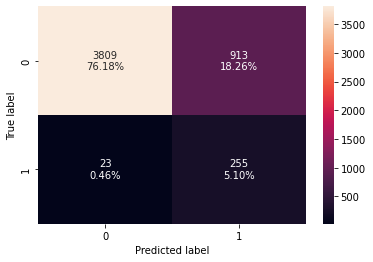

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(XGBST_clsfr_undrsmpl_tuned,X_val, y_val)

###Tuning method for Logistic Regression tree with undersampled data

In [ ]:
# defining model
Model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'C': np.arange(0.1,1.1,0.1)}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'C': 0.1} with CV score=0.8653560349181155:


In [ ]:
# building model with best parameters
LgstcRgrsn_clsfr_undrsmpl_tuned = LogisticRegression(
                                            C=0.1,
                                            random_state=1)

# Fit the model on training data
LgstcRgrsn_clsfr_undrsmpl_tuned.fit(X_train_un, y_train_un)

LogisticRegression(C=0.1, random_state=1)

In [ ]:
# Calculating different metrics on training set
Model_LgstcRgrsn_clsfr_undrsmpl_tuned_Trng = model_performance_classification_sklearn(
    LgstcRgrsn_clsfr_undrsmpl_tuned, X_train_un, y_train_un
)
print("Training performance:")
Model_LgstcRgrsn_clsfr_undrsmpl_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.873,0.875,0.872,0.873


In [ ]:
# Calculating different metrics on Validation set
Model_LgstcRgrsn_clsfr_undrsmpl_tuned_vldtn = model_performance_classification_sklearn(
    LgstcRgrsn_clsfr_undrsmpl_tuned, X_val, y_val
)
print("Validation performance:")
Model_LgstcRgrsn_clsfr_undrsmpl_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.857,0.853,0.260,0.399


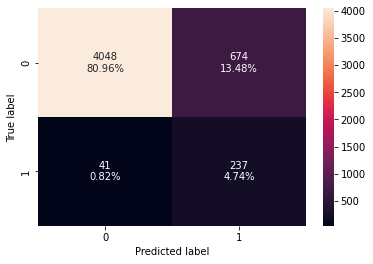

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(LgstcRgrsn_clsfr_undrsmpl_tuned,X_val, y_val)

### Tuning method for Bagging Classifier  with undersampled data

In [ ]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid =  { 'max_samples': [0.8,0.9,1],
               'max_features': [0.7,0.8,0.9],
               'n_estimators' : [30,50,70] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.8966236202294207:


In [ ]:
# building model with best parameters
Bgng_clsfr_undrsmpl_tuned = BaggingClassifier(n_estimators=70,
                                     max_samples= 0.9,
                                     max_features=0.9,
                                     random_state=1)

# Fit the model on training data
Bgng_clsfr_undrsmpl_tuned.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70,
                  random_state=1)

In [ ]:
# Calculating different metrics on training set
Model_bgng_clsfr_undrsmpl_tuned_Trng = model_performance_classification_sklearn(
    Bgng_clsfr_undrsmpl_tuned, X_train_un, y_train_un
)
print("Training performance:")
Model_bgng_clsfr_undrsmpl_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
# Calculating different metrics on Validation set
Model_bgng_clsfr_undrsmpl_tuned_vldtn = model_performance_classification_sklearn(
    Bgng_clsfr_undrsmpl_tuned, X_val, y_val
)
print("Validation performance:")
Model_dt_undrsmpl_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.609,0.888,0.114,0.202


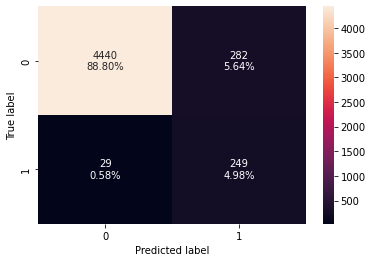

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(Bgng_clsfr_undrsmpl_tuned,X_val, y_val)

### Tuning method for AdaBoost Classifier with undersampled data

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [100, 150, 200],
              "learning_rate": [0.2, 0.05],
              "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1), ] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8846114998917827:


In [ ]:
# building model with best parameters
Adabst_clsfr_undrsmpl_tuned = AdaBoostClassifier(
                                            n_estimators=100,
                                            learning_rate= 0.05,
                                            base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1),
                                            random_state=1)

# Fit the model on training data
Adabst_clsfr_undrsmpl_tuned.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [ ]:
# Calculating different metrics on training set
Model_Adabst_clsfr_undrsmpl_tuned_Trng = model_performance_classification_sklearn(
    Adabst_clsfr_undrsmpl_tuned, X_train_un, y_train_un
)
print("Training performance:")
Model_Adabst_clsfr_undrsmpl_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.969,0.944,0.994,0.968


In [ ]:
# Calculating different metrics on Validation set
Model_Adabst_clsfr_undrsmpl_tuned_vldtn = model_performance_classification_sklearn(
    Adabst_clsfr_undrsmpl_tuned, X_val, y_val
)
print("Validation performance:")
Model_Adabst_clsfr_undrsmpl_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.929,0.888,0.431,0.580


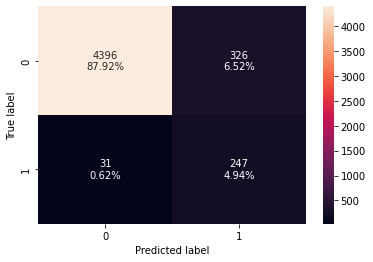

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(Adabst_clsfr_undrsmpl_tuned,X_val, y_val)

### Tuning method for GradientBoosting Classifier with undersampled data

In [ ]:
# defining model

Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
              "subsample":[0.5,0.7],
              "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.2} with CV score=0.9014212538777866:


In [ ]:
# building model with best parameters
Grdnt_clsfr_undrsmpl_tuned = GradientBoostingClassifier(subsample=0.5,
                                            n_estimators=100,
                                            learning_rate= 0.2,
                                            max_features=0.7,
                                            random_state=1)

# Fit the model on training data
Grdnt_clsfr_undrsmpl_tuned.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.7, random_state=1,
                           subsample=0.5)

In [ ]:
# Calculating different metrics on training set
Model_Grdnt_clsfr_undrsmpl_tuned_Trng = model_performance_classification_sklearn(
    Grdnt_clsfr_undrsmpl_tuned, X_train_un, y_train_un
)
print("Training performance:")
Model_Grdnt_clsfr_undrsmpl_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.991,0.984,0.998,0.991


In [ ]:
# Calculating different metrics on Validation set
Model_Grdnt_clsfr_undrsmpl_tuned_vldtn = model_performance_classification_sklearn(
    Grdnt_clsfr_undrsmpl_tuned, X_val, y_val
)
print("Validation performance:")
Model_Grdnt_clsfr_undrsmpl_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.919,0.885,0.396,0.547


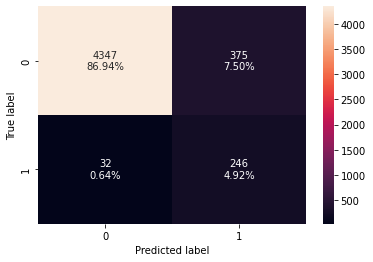

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(Grdnt_clsfr_undrsmpl_tuned,X_val, y_val)

### Tuning method for RandomForest Classifier with undersampled data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300],
              "min_samples_leaf": np.arange(1, 4),
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8978140105331505:


In [ ]:
# building model with best parameters
Rndmfrst_clsfr_undrsmpl_tuned = RandomForestClassifier(
                                            n_estimators=250,
                                            min_samples_leaf= 1,
                                            max_samples=0.6,
                                            max_features='sqrt',
                                            random_state=1)

# Fit the model on training data
Rndmfrst_clsfr_undrsmpl_tuned.fit(X_train_un, y_train_un)# building model with best parameters

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250,
                       random_state=1)

In [ ]:
# Calculating different metrics on training set
Model_Rndmfrst_clsfr_undrsmpl_tuned_Trng = model_performance_classification_sklearn(
    Rndmfrst_clsfr_undrsmpl_tuned, X_train_un, y_train_un
)
print("Training performance:")
Model_Rndmfrst_clsfr_undrsmpl_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.988,0.977,0.999,0.988


In [ ]:
# Calculating different metrics on Validation set
Model_Rndmfrst_clsfr_undrsmpl_tuned_vldtn = model_performance_classification_sklearn(
    Rndmfrst_clsfr_undrsmpl_tuned, X_val, y_val
)
print("Validation performance:")
Model_Rndmfrst_clsfr_undrsmpl_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.944,0.885,0.496,0.636


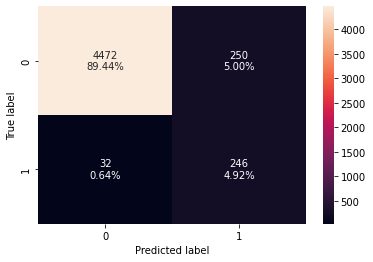

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(Rndmfrst_clsfr_undrsmpl_tuned,X_val, y_val)

## Model performance comparison and choosing the final model

In [ ]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        Model_Rndmfrst_clsfr_undrsmpl_tuned_Trng.T,
        Model_Rndmfrst_clsfr_ovrsmpl_tuned_Trng.T,
        Model_Rndmfrst_clsfr_OData_tuned_Trng.T,
        Model_Grdnt_clsfr_undrsmpl_tuned_Trng.T,
        Model_Grdnt_clsfr_ovrsmpl_tuned_Trng.T,
        Model_Grdnt_clsfr_OData_tuned_Trng.T,
        Model_LgstcRgrsn_clsfr_undrsmpl_tuned_Trng.T,
        Model_LgstcRgrsn_clsfr_ovrsmpl_tuned_Trng.T,
        Model_LgstcRgrsn_clsfr_OData_tuned_Trng.T,
        Model_Adabst_clsfr_undrsmpl_tuned_Trng.T,
        Model_Adabst_clsfr_ovrsmpl_tuned_Trng.T,
        Model_Adabst_clsfr_OData_tuned_Trng.T,
        Model_bgng_clsfr_undrsmpl_tuned_Trng.T,
        Model_bgng_clsfr_ovrsmpl_tuned_Trng.T,
        Model_bgng_clsfr_OData_tuned_Trng.T,
        Model_XGBST_clsfr_undrsmpl_tuned_Trng.T,
        Model_XGBST_clsfr_ovrsmpl_tuned_Trng.T,
        Model_XGBST_clsfr_OData_tuned_Trng.T,
        Model_dt_undrsmpl_tuned_Trng.T,
        Model_dt_ovrsmpl_tuned_Trng.T,
        Model_dt_OData_tuned_Trng.T


    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Random Forest tuned with undersampled data",
    "Random Forest tuned with oversample data",
    "Random forest tuned with original data",
    "Gradient Boosting tuned with undersampled data",
    "Gradient Boosting tuned with oversample data",
    "Gradient Boosting tuned with original data",
    "Logistic regression tuned with undersampled data",
    "Logistic regression tuned with oversample data",
    "Logistic regression tuned with original data",
    "AdaBoost tuned with undersampled data",
    "AdaBoost tuned with oversample data",
    "AdaBoost tuned with original data",
    "Bagging Classifier tuned with undersampled data",
    "Bagging Classifier tuned with oversample data",
    "Bagging Classifier tuned with original data",
    "XGBOOST Classifier tuned with undersampled data",
    "XGBOOST Classifier tuned with oversample data",
    "XGBOOST Classifier tuned with original data",
    "Decision Tree Classifier tuned with undersampled data",
    "Decision Tree Classifier tuned with oversample data",
    "Decision Tree Classifier tuned with original data"


]

print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Random Forest tuned with undersampled data,Random Forest tuned with oversample data,Random forest tuned with original data,Gradient Boosting tuned with undersampled data,Gradient Boosting tuned with oversample data,Gradient Boosting tuned with original data,Logistic regression tuned with undersampled data,Logistic regression tuned with oversample data,Logistic regression tuned with original data,AdaBoost tuned with undersampled data,AdaBoost tuned with oversample data,AdaBoost tuned with original data,Bagging Classifier tuned with undersampled data,Bagging Classifier tuned with oversample data,Bagging Classifier tuned with original data,XGBOOST Classifier tuned with undersampled data,XGBOOST Classifier tuned with oversample data,XGBOOST Classifier tuned with original data,Decision Tree Classifier tuned with undersampled data,Decision Tree Classifier tuned with oversample data,Decision Tree Classifier tuned with original data
Accuracy,0.988,1.000,0.995,0.991,0.993,0.994,0.873,0.880,0.967,0.969,0.992,0.999,1.000,1.000,0.999,0.971,0.940,0.993,0.764,0.843,0.974
Recall,0.977,0.999,0.909,0.984,0.992,0.906,0.875,0.884,0.495,0.944,0.988,0.984,1.000,1.000,0.978,1.000,1.000,0.963,0.909,0.917,0.591
Precision,0.999,1.000,1.000,0.998,0.994,0.986,0.872,0.878,0.844,0.994,0.995,1.000,1.000,1.000,1.000,0.944,0.480,0.909,0.705,0.799,0.904
F1,0.988,1.000,0.952,0.991,0.993,0.944,0.873,0.881,0.624,0.968,0.992,0.992,1.000,1.000,0.989,0.971,0.649,0.935,0.794,0.854,0.715


In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        Model_Rndmfrst_clsfr_undrsmpl_tuned_vldtn.T,
        Model_Rndmfrst_clsfr_ovrsmpl_tuned_vldtn.T,
        Model_Rndmfrst_clsfr_OData_tuned_vldtn.T,
        Model_Grdnt_clsfr_undrsmpl_tuned_vldtn.T,
        Model_Grdnt_clsfr_ovrsmpl_tuned_vldtn.T,
        Model_Grdnt_clsfr_OData_tuned_vldtn.T,
        Model_LgstcRgrsn_clsfr_undrsmpl_tuned_vldtn.T,
        Model_LgstcRgrsn_clsfr_ovrsmpl_tuned_vldtn.T,
        Model_LgstcRgrsn_clsfr_OData_tuned_vldtn.T,
        Model_Adabst_clsfr_undrsmpl_tuned_vldtn.T,
        Model_Adabst_clsfr_ovrsmpl_tuned_vldtn.T,
        Model_Adabst_clsfr_OData_tuned_vldtn.T,
        Model_bgng_clsfr_undrsmpl_tuned_vldtn.T,
        Model_bgng_clsfr_ovrsmpl_tuned_vldtn.T,
        Model_bgng_clsfr_OData_tuned_vldtn.T,
        Model_XGBST_clsfr_undrsmpl_tuned_vldtn.T,
        Model_XGBST_clsfr_ovrsmpl_tuned_vldtn.T,
        Model_XGBST_clsfr_OData_tuned_vldtn.T,
        Model_dt_undrsmpl_tuned_vldtn.T,
        Model_dt_ovrsmpl_tuned_vldtn.T,
        Model_dt_OData_tuned_vldtn.T


    ],
    axis=1,
)

models_val_comp_df.columns = [
    "Random Forest tuned with undersampled data",
    "Random Forest tuned with oversample data",
    "Random forest tuned with original data",
    "Gradient Boosting tuned with undersampled data",
    "Gradient Boosting tuned with oversample data",
    "Gradient Boosting tuned with original data",
    "Logistic regression tuned with undersampled data",
    "Logistic regression tuned with oversample data",
    "Logistic regression tuned with original data",
    "AdaBoost tuned with undersampled data",
    "AdaBoost tuned with oversample data",
    "AdaBoost tuned with original data",
    "Bagging Classifier tuned with undersampled data",
    "Bagging Classifier tuned with oversample data",
    "Bagging Classifier tuned with original data",
    "XGBOOST Classifier tuned with undersampled data",
    "XGBOOST Classifier tuned with oversample data",
    "XGBOOST Classifier tuned with original data",
    "Decision Tree Classifier tuned with undersampled data",
    "Decision Tree Classifier tuned with oversample data",
    "Decision Tree Classifier tuned with original data"


]

print("Validation performance comparison:")
models_val_comp_df





Validation performance comparison:


,Random Forest tuned with undersampled data,Random Forest tuned with oversample data,Random forest tuned with original data,Gradient Boosting tuned with undersampled data,Gradient Boosting tuned with oversample data,Gradient Boosting tuned with original data,Logistic regression tuned with undersampled data,Logistic regression tuned with oversample data,Logistic regression tuned with original data,AdaBoost tuned with undersampled data,AdaBoost tuned with oversample data,AdaBoost tuned with original data,Bagging Classifier tuned with undersampled data,Bagging Classifier tuned with oversample data,Bagging Classifier tuned with original data,XGBOOST Classifier tuned with undersampled data,XGBOOST Classifier tuned with oversample data,XGBOOST Classifier tuned with original data,Decision Tree Classifier tuned with undersampled data,Decision Tree Classifier tuned with oversample data,Decision Tree Classifier tuned with original data
Accuracy,0.944,0.988,0.983,0.919,0.969,0.982,0.857,0.868,0.966,0.929,0.979,0.986,0.938,0.986,0.984,0.813,0.916,0.983,0.609,0.763,0.970
Recall,0.885,0.860,0.712,0.885,0.856,0.766,0.853,0.849,0.482,0.888,0.853,0.763,0.896,0.867,0.737,0.917,0.881,0.845,0.888,0.885,0.583
Precision,0.496,0.926,0.985,0.396,0.678,0.891,0.260,0.277,0.843,0.431,0.790,0.972,0.469,0.883,0.958,0.218,0.388,0.845,0.114,0.176,0.822
F1,0.636,0.892,0.827,0.547,0.757,0.824,0.399,0.418,0.613,0.580,0.820,0.855,0.616,0.875,0.833,0.353,0.539,0.845,0.202,0.294,0.682


####Observation

1.  It is observed that Randomised Search CV was applied on original data, oversample data and undersample data on different models.
2.   Below model have better recall or a chance of improvement:

  1. Gradient Boosting tuned with undersampled data
  2. Logistic regression tuned with original data
  3. Decision Tree Classifier tuned with original data
  4. XGBOOST Classifier tuned with undersampled data
























###Gradient Boosting tuned with undersampled data using Grid search CV

In [ ]:
# defining model

Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in gridSearchcv
param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
              "subsample":[0.5,0.7],
              "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
grid_cv = GridSearchCV(estimator=Model, param_grid=param_grid,  n_jobs = -1, scoring=scorer, cv=5)

#Fitting parameters in RandomizedSearchCV
grid_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'learning_rate': 0.2, 'max_features': 0.7, 'n_estimators': 100, 'subsample': 0.5} with CV score=0.9014212538777866:


In [ ]:
# building model with best parameters
Grdnt_clsfr_undrsmpl_gsrch_tuned = GradientBoostingClassifier(subsample=0.5,
                                            n_estimators=100,
                                            learning_rate= 0.2,
                                            max_features=0.7,
                                            random_state=1)

# Fit the model on training data
Grdnt_clsfr_undrsmpl_gsrch_tuned.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.7, random_state=1,
                           subsample=0.5)

In [ ]:
# Calculating different metrics on training set
Model_Grdnt_clsfr_undrsmpl_gsrch_tuned_Trng = model_performance_classification_sklearn(
    Grdnt_clsfr_undrsmpl_gsrch_tuned, X_train_un, y_train_un
)
print("Training performance:")
Model_Grdnt_clsfr_undrsmpl_gsrch_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.991,0.984,0.998,0.991


In [ ]:
# Calculating different metrics on Validation set
Model_Grdnt_clsfr_undrsmpl_grsrch_tuned_vldtn = model_performance_classification_sklearn(
    Grdnt_clsfr_undrsmpl_gsrch_tuned, X_val, y_val
)
print("Validation performance:")
Model_Grdnt_clsfr_undrsmpl_grsrch_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.919,0.885,0.396,0.547


###XGBOOST tuned with undersampled data using Grid search CV

In [ ]:
# defining model
Model = XGBClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
param_grid={ 'n_estimators': [150, 200, 250],
            'scale_pos_weight': [5,10],
            'learning_rate': [0.1,0.2],
            'gamma': [0,3,5],
            'subsample': [0.8,0.9] }

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=Model, param_grid=param_grid,  n_jobs = -1, scoring=scorer, cv=5)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'gamma': 3, 'learning_rate': 0.1, 'n_estimators': 150, 'scale_pos_weight': 10, 'subsample': 0.9} with CV score=0.9326671957290239:


In [ ]:
# building model with best parameters
XGBST_clsfr_undrsmpl_gsrch_tuned = XGBClassifier(
                                          subsample=0.9,
                                          scale_pos_weight=10,
                                          n_estimators=200,
                                          learning_rate=0.1,
                                          gamma=5)

# Fit the model on training data
XGBST_clsfr_undrsmpl_gsrch_tuned.fit(X_train_un, y_train_un)

XGBClassifier(gamma=5, n_estimators=200, scale_pos_weight=10, subsample=0.9)

In [ ]:
# Calculating different metrics on training set
Model_XGBST_clsfr_undrsmpl_grsrch_tuned_Trng = model_performance_classification_sklearn(
    XGBST_clsfr_undrsmpl_gsrch_tuned, X_train_un, y_train_un
)
print("Training performance:")
Model_XGBST_clsfr_undrsmpl_grsrch_tuned_Trng

Training performance:


,Accuracy,Recall,Precision,F1
0,0.971,1.000,0.944,0.971


In [ ]:
# Calculating different metrics on Validation set
Model_XGBST_clsfr_undrsmpl_grsrch_tuned_vldtn = model_performance_classification_sklearn(
    XGBST_clsfr_undrsmpl_gsrch_tuned, X_val, y_val
)
print("Validation performance:")
Model_XGBST_clsfr_undrsmpl_grsrch_tuned_vldtn

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.813,0.917,0.218,0.353


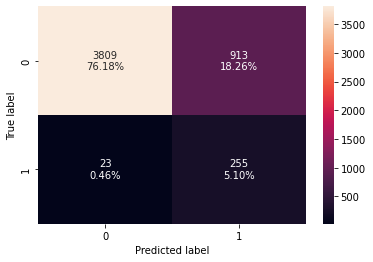

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(XGBST_clsfr_undrsmpl_gsrch_tuned,X_val, y_val)

####Observation

1. It is observed that XGBOOST estimator on the undersample data is performing consistently on the random search cv and grid search cv  and has high recall with stable values.

### Test set final performance

#### XGBOOST Classifier undersampled tuned with test data

In [ ]:
# Calculating different metrics on the test set
xboost_grid_test = model_performance_classification_sklearn(XGBST_clsfr_undrsmpl_gsrch_tuned, X_test, y_test)
print("Test performance:")
xboost_grid_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.812,0.883,0.215,0.346


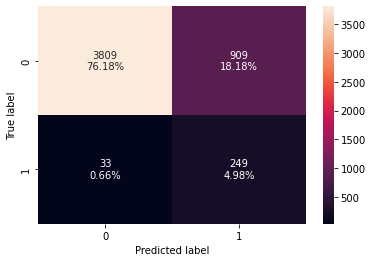

In [ ]:
# Creating the confusion Matrix
confusion_matrix_sklearn(XGBST_clsfr_undrsmpl_gsrch_tuned,X_test, y_test)

####Observation

1.   The performance on test data is generalised
2.   It is observed that no major gap between the test, random search , grid search on undersampled data was observed, even though the precision was low.



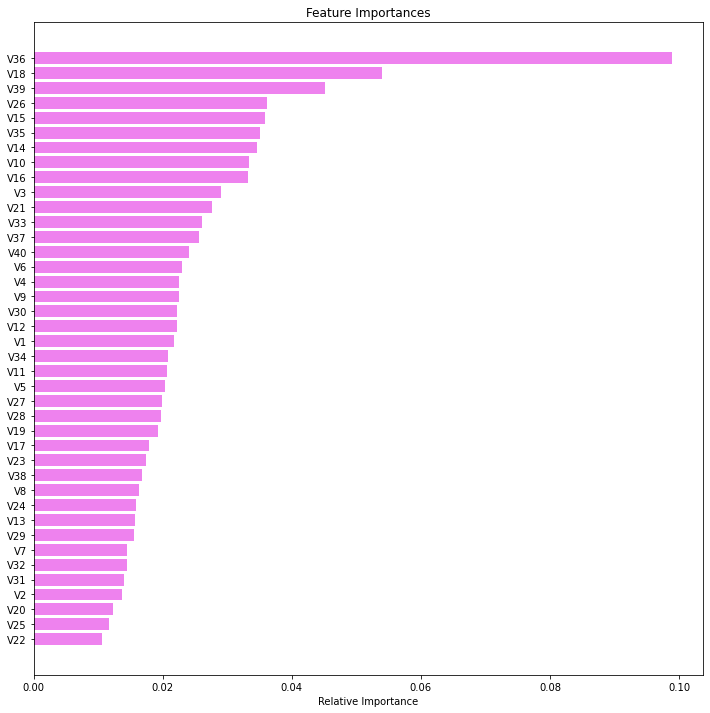

In [ ]:
feature_names = X.columns
importances = XGBST_clsfr_undrsmpl_gsrch_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

####Obsevations

1. It is observed that above features as the important as per the prirority .

## Pipelines to build the final model


In [ ]:
# As we already know the final model, we will not be splitting train set into train and validation sets

X_train_pipeline = df.drop("Target", axis=1)
y_train_pipeline = df["Target"]

In [ ]:
X_test_pipeline = df_test.drop("Target", axis=1)
y_test_pipeline = df_test["Target"]

In [ ]:
model_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        (
            "XGB",
            XGBClassifier(
                subsample=0.9,
                scale_pos_weight=10,
                n_estimators=200,
                learning_rate=0.1,
                gamma=5,
                random_state=1,
                eval_metric="logloss",
            ),
        ),
    ]
)
# Fit the model on training data
model_pipeline.fit(X_train_pipeline, y_train_pipeline)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('XGB',
                 XGBClassifier(eval_metric='logloss', gamma=5, n_estimators=200,
                               random_state=1, scale_pos_weight=10,
                               subsample=0.9))])

In [ ]:
# transforming and predicting on test data
model_pipeline.predict(X_test_pipeline)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# To check the score on the training pipeline
model_pipeline.score(X_train_pipeline,y_train_pipeline)

0.991

In [ ]:
# To check the score on the testing pipeline
model_pipeline.score(X_test_pipeline,y_test_pipeline)

0.9838

####Observations

1. It is observed that  pipeline performance is as expected and  pipeline score are looking good after preprocessing steps.

# Business Insights and Conclusions

1. It is observed that after performing models on the original data, oversample data and undersample techniques using the Randomized search and the Grid search CV , even though other models perform good , as the precision level for the XGBOOST undersample performed good.
2. It is observed that False Positive number is high, it requires more inspection costs.
3. It is observed that V29,36,15,18, 39 should be given more importance and checked for any issues.
4. It is observed that XGBOOST undersample has very good validation and test results at 88.3 and 91.7 .
5. It is observed that pipeline has been built to productionaize the findings and reduce any impact .

***